Sinh viên thực hiện:
 - Nguyễn Hoàng Hiệp - 15520214
 - Nguyễn Hoàng Luân - 15520452

##1.Khai báo các thư viện cần thiết

In [0]:
# ***
# Import library
# Thư viện sử lý số
import pandas as pd
import numpy as np
import time
from collections import Counter
import matplotlib.patches as mpatches
from timeit import default_timer as timer

# Thư hiện vẽ biểu đồ 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
import itertools

# Thư viện xây dựng mô hình
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN

# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Connect to google drive

### Cách 1: Sử dụng dữ liệu cá nhân

In [0]:
# Kết nối với gg driver
from google.colab import drive
drive.mount('drive')
# Cách pass auth: Nhấn vào link -> chọn tài khoản google uit -> copy auth -> dán vào ô input bên dưới-> nhấn enter

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
# Đường dẫn đến nơi lưu trữ dữ liệu trong drive
path = '/content/drive/My Drive/Colab Notebooks/Graduation Thesis/\
Data/data 1.csv'
print('DONE')

DONE


### Cách 2: có thể chia sẻ cho người khác có thể chạy thử

In [0]:
# ***
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# ***
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# ***
# DỮ LIỆU THÔ
# Download a file based on its file ID.
#  là id đường dẫn chia sẽ file tài liều
# example: https://drive.google.com/file/d/1rNwi9Ki1ujzHH4Q0rzXImW47tbZmR3Ds/view
# ID : 1rNwi9Ki1ujzHH4Q0rzXImW47tbZmR3Ds
file_id = '1iGVOvK2Td5qZdRkv76cMeMGEWX-0P_aN'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('financial.csv') # dowload file
# Đọc dữ liệu
data = pd.read_csv('financial.csv')

In [0]:
# ============ Chạy model - chỉ cần gọi tệp dữ liệu đã được làm sạch ===========
# DỮ LIỆU ĐÃ LÀM SẠCH VÀ CHƯA SỬ LÝ CÂN BẰNG
# Link dữ liệu: https://drive.google.com/file/d/1jzYF3YPckd619VnNMqeHW-xuiF7lqzSH/view?usp=sharing
file_id = '1jzYF3YPckd619VnNMqeHW-xuiF7lqzSH'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data_train.csv') # dowload file
data_clean = pd.read_csv('data_train.csv')

In [0]:
# DỮ LIỆU ĐÃ LÀM SẠCH VÀ SỬ LÝ CÂN BẰNG: UNDERSAMPLING
# Link dữ liệu: https://drive.google.com/file/d/1-JBcZ6YPCCKeei0iZ0zPcgFKGVm8-IP3/view?usp=sharing
file_id = '1-JBcZ6YPCCKeei0iZ0zPcgFKGVm8-IP3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data_under_sampling.csv') # dowload file
data_under_sampling = pd.read_csv('data_under_sampling.csv')

In [0]:
# DỮ LIỆU ĐÃ LÀM SẠCH VÀ SỬ LÝ CÂN BẰNG: OVERSAMPLING
# Link dữ liệu: https://drive.google.com/file/d/1Ris1CnorA4uHGAIjPrOdu2N0GcKaPwI6/view?usp=sharing
file_id = '1Ris1CnorA4uHGAIjPrOdu2N0GcKaPwI6'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data_over_sampling.csv') # dowload file
df_with_overspampling = pd.read_csv('data_over_sampling.csv')

##2.Tìm hiểu tổng quan dữ liệu

Mô tả:
PaySim mô phỏng các giao dịch tiền điện thoại di động dựa trên một mẫu các giao dịch thực được trích từ một tháng nhật ký tài chính từ một dịch vụ tiền điện thoại di động được thực hiện ở một quốc gia châu Phi. Nhật ký ban đầu được cung cấp bởi một công ty đa quốc gia, nhà cung cấp dịch vụ tài chính di động hiện đang hoạt động tại hơn 14 quốc gia trên toàn thế giới.

**Headers - mô tả được cung cấp**  

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount - amount of the transaction in local currency.

- nameOrig - customer who started the transaction

- oldbalanceOrg - initial balance before the transaction

- newbalanceOrig - new balance after the transaction

- nameDest - customer who is the recipient of the transaction

- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

###Kiểu dữ liệu các thuộc tính

In [0]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [0]:
# Hiện thị kiểu dữ liểu của các thuộc tính
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [0]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


###Kích thước dữ liệu

In [0]:
# Kích thước dữ liệu
data.shape

(6362620, 11)

**Nhận xét:**
- Dữ liệu có 6.362.620 dòng, 11 cột như trên.

In [0]:
# Số lượng giao dịch bình thường và số lượng giao dịch gian lận
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**Nhận xét:**
- Dữ liệu có 6354407 giao dịch bình thường
- và 8213 giao dịch gian lận

###Đếm số dòng dữ liệu bị thiếu

In [0]:
data.isnull().values.any()

False

In [0]:
# BƯớc này không cần thiết trong trường hợp này vì không có dữ liệu khuyết
missing_data = data.isnull()
missing_data.head(5)

- True: dữ liệu bị thiếu
- False: có dữ liệu

###Đếm số dòng dữ liệu thiếu cho mỗi thuộc tính

In [0]:
# BƯớc này không cần thiết trong trường hợp này vì không có dữ liệu khuyết
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

==> Không có dữ liệu thiếu trong tập dữ liệu

##3.Phân tích dữ liệu


###3.1 những loại giao dịch gian lận

####Phân phối xác suất cột loại giao dịch

In [0]:
# Cột loại giao dịch
data['type'].value_counts().to_frame()

,type
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


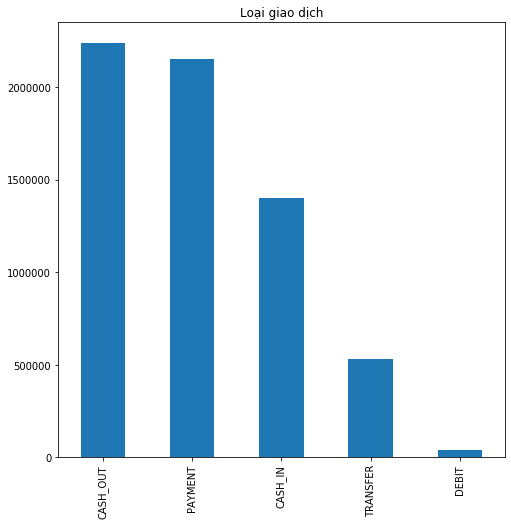

In [0]:
# Biểu đồ thể hiện sô lượng theo loại giao dịch
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Loại giao dịch", ax=ax, figsize=(8,8))
plt.show()

In [0]:
# Phân phối xác suất giao dịch gian lận là không gian lận ở giao dịch 'PAYMENT'
F = data[data['type'] == 'PAYMENT']['isFraud']
print('PAYMENT {}'.format(Counter(F)))

PAYMENT Counter({0: 2151495})


Ở cột `isFraud` Trong tập dữ liệu:  
    - 0: là giao dịch bình thường
    - 1: là giao dịch gian lận  
==> Toàn bộ giao dịch loại `PAYMENT` là giao dich bình thường

Thực hiện tương tự cho các loại giao dịch còn lại:

In [0]:
F = data[data['type'] == 'TRANSFER']['isFraud']
print('TRANSFER {}'.format(Counter(F)))
F = data[data['type'] == 'CASH_OUT']['isFraud']
print('CASH_OUT {}'.format(Counter(F)))
F = data[data['type'] == 'DEBIT']['isFraud']
print('DEBIT {}'.format(Counter(F)))
F = data[data['type'] == 'CASH_IN']['isFraud']
print('CASH_IN {}'.format(Counter(F)))

TRANSFER Counter({0: 528812, 1: 4097})
CASH_OUT Counter({0: 2233384, 1: 4116})
DEBIT Counter({0: 41432})
CASH_IN Counter({0: 1399284})


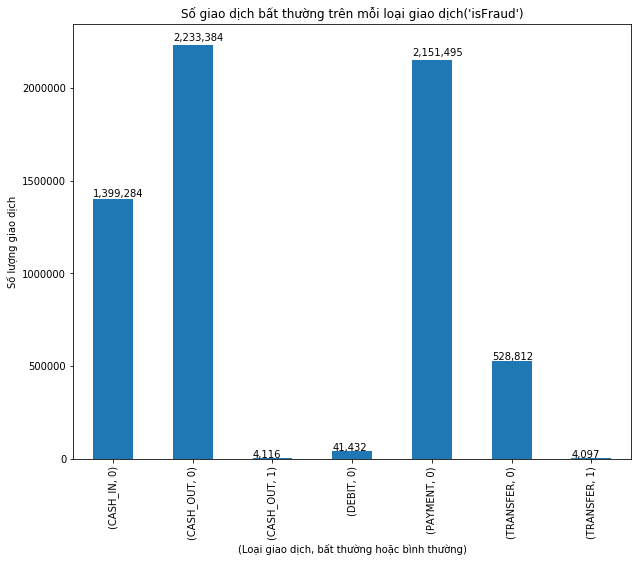

In [0]:
# Biểu đồ thể hiện số lượng giao dịch theo loại giao dịch trên dừng loại gian lận
ax = data.groupby(['type', 'isFraud']).size().plot(kind='bar', figsize=(10, 8))
ax.set_title("Số giao dịch bất thường trên mỗi loại giao dịch('isFraud')")
ax.set_xlabel("(Loại giao dịch, bất thường hoặc bình thường)")
ax.set_ylabel("Số lượng giao dịch")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [0]:
data.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

Nhận xét:  
    - Chỉ có 2 loại giao dịch `TRANSFER` và `CASH_OUT` là có giao dịch gian lận    
    - Số lượng giao dịch gian lận ở 2 loại giao dịch gần như bằng nhau  
Một giả định dự đoán có:  
    - Giao dịch gian lận: Tiền được chuyển từ tài khoản này -> sang tài khoảng khác để rút ra

In [0]:
print('\n Các loại giao dịch có giao dịch gian lận {}'.format(\
list(data.loc[data.isFraud == 1].type.drop_duplicates().values)))


 Các loại giao dịch có giao dịch gian lận ['TRANSFER', 'CASH_OUT']


In [0]:
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print ('\n Số lượng \'giao dịch chuyển tiền\' là gian lận = {}'.\
       format(len(dfFraudTransfer)))

print ('\n Số lượng \'giao dịch rút tiền\' là gian lận = {}'.\
       format(len(dfFraudCashout))) # 4116


 Số lượng 'giao dịch chuyển tiền' là gian lận = 4097

 Số lượng 'giao dịch rút tiền' là gian lận = 4116


###3.2 Tìm hiểu ý nghĩa thuộc tính isFlaggedFraud

Thông tin được cung cấp: isFlaggedFraud = 1 khi giao dịch chuyển tiền có giá trị lớn hơn 200.000(không chỉ rõ giá trị nào) ==> cần tìm hiểu

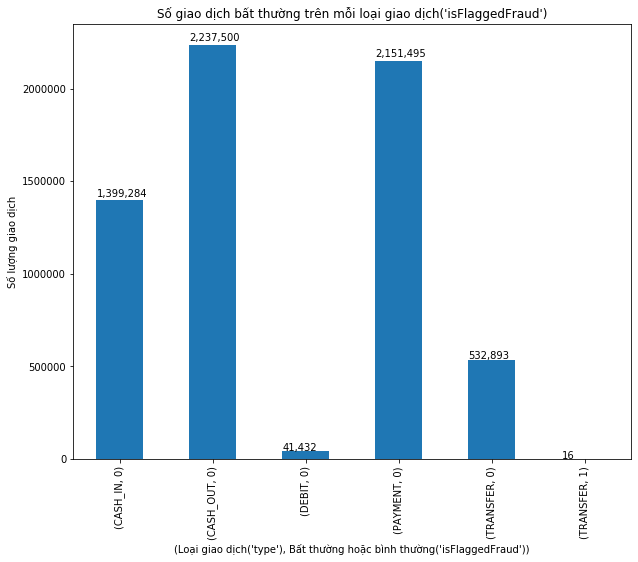

In [0]:
ax = data.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar', figsize=(10, 8))
ax.set_title("Số giao dịch bất thường trên mỗi loại giao dịch('isFlaggedFraud')")
ax.set_xlabel("(Loại giao dịch('type'), Bất thường hoặc bình thường('isFlaggedFraud'))")
ax.set_ylabel("Số lượng giao dịch")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [0]:
data.groupby(['type', 'isFlaggedFraud']).size()

type      isFlaggedFraud
CASH_IN   0                 1399284
CASH_OUT  0                 2237500
DEBIT     0                   41432
PAYMENT   0                 2151495
TRANSFER  0                  532893
          1                      16
dtype: int64

**Nhận xét:**
- Chỉ có 16 giao dịch chuyển tiền được đánh dấu 'isFlaggedFraud' trong toàn bộ dữ liệu

####Giả thuyết: Thuộc tính 'amount' >= 200000

In [0]:
print('\nNhững loại giao dịch có thuộc tính `isFlaggedFraud` được đánh dấu: \
{}'.format(list(data.loc[data.isFlaggedFraud == 1].type.drop_duplicates()))) 


Những loại giao dịch có thuộc tính `isFlaggedFraud` được đánh dấu: ['TRANSFER']


In [0]:
dfTransfer = data.loc[data.type == 'TRANSFER'] # Lấy ra các dòng có type là TRANSFER
dfFlagged = data.loc[data.isFlaggedFraud == 1] # Lấy ra các dòng có isFlaggedFraud là 1
dfNotFlagged = data.loc[data.isFlaggedFraud == 0] # Lấy ra các dòng có isFlaggedFraud là 0

print('\nGiá trị giao dịch nhỏ nhất khi isFlaggedFraud được đánh dấu(1) = {}'\
                                  .format(dfFlagged.amount.min()))

print('\nGiá trị giao dịch lớn nhất có loại giao dịch chuyển tiền khi isFlaggedFraud không được đánh dấu(0)=\
 {}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()))


Giá trị giao dịch nhỏ nhất khi isFlaggedFraud được đánh dấu(1) = 353874.22

Giá trị giao dịch lớn nhất có loại giao dịch chuyển tiền khi isFlaggedFraud không được đánh dấu(0)= 92445516.64


In [0]:
dfTransfer.isFlaggedFraud.sum()

16

In [0]:
len(dfTransfer.loc[(dfTransfer['amount'] >= 200000) & (dfTransfer['isFlaggedFraud'] == 0)])

409094

***Thực tế ***  
*   isFlaggedFraud vẫn không thể được đặt mặc dù điều kiện này được đáp ứng.(409094 như kết quả ở trên)  
==>   Loại trường hợp 'isFlaggedFraud' phụ thuộc vào điều kiện thuộc tính 'amount' >= 200000





####Giả thuyết: isFlaggedFraud = 1 khi giao dịch chuyển tiền bị hủy
- Số dư tài khoản nhận tiền trước và sau giao dịch đều bằng 0.

In [0]:
print('\nSố giao dịch chuyển tiền với isFlaggedFraud = 0, oldBalanceDest = 0 và\
 newBalanceDest = 0: {}'.\
format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & \
(dfTransfer.oldbalanceDest == 0) & (dfTransfer.newbalanceDest == 0)])))


Số giao dịch chuyển tiền với isFlaggedFraud = 0, oldBalanceDest = 0 và newBalanceDest = 0: 4158


==> Các điều kiện này cũng không xác định được trạng thái của `isFlaggedFraud`  
Loại giải thuyết này

####Giả thuyết: isFlaggedFraud = 1 khi `oldbalanceOrg` = `newbalanceOrg`
- Không set thuộc tính 'newBalanceOrig' vì nó chỉ được cập nhật sau khi giao dịch, trong khi 'isFlaggedFraud' sẽ được đặt trước khi giao dịch diễn ra

In [0]:
print('Giá trị \'nhỏ nhất\' \'lớn nhất\' của thuộc tính \'oldBalanceOrig\' với \'isFlaggedFraud\' = 1 các giao dịch TRANSFERs: {}'.\
format([round(dfFlagged.oldbalanceOrg.min()), round(dfFlagged.oldbalanceOrg.max())]))

print('\nGiá trị \'nhỏ nhất\' \'lớn nhất\' của thuộc tính \'oldBalanceOrig\' for \'isFlaggedFraud\' = 0 các giao dịch TRANSFERs với điều kiện \
\'oldBalanceOrig\' = \
newbalanceOrig: {}'.format(\
[dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
== dfTransfer.newbalanceOrig)].oldbalanceOrg.min(), \
round(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
               == dfTransfer.newbalanceOrig)].oldbalanceOrg.max())]))

Giá trị 'nhỏ nhất' 'lớn nhất' của thuộc tính 'oldBalanceOrig' với 'isFlaggedFraud' = 1 các giao dịch TRANSFERs: [353874, 19585040]

Giá trị 'nhỏ nhất' 'lớn nhất' của thuộc tính 'oldBalanceOrig' for 'isFlaggedFraud' = 0 các giao dịch TRANSFERs với điều kiện 'oldBalanceOrig' = newbalanceOrig: [0.0, 575668]


Nhận xét:
- Có tồn tại trường hợp thỏa điều kiện những thuôc tính 'isFlaggedFraud' = 0  
==> Loại giả thuyết này

####Giả thuyết: 'IsFlaggedFraud có thể được đặt dựa trên việc một khách hàng giao dịch nhiều lần không?

In [0]:
print('Người khởi tạo các giao dịch được gắn cờ là gian lận có giao dịch nhiều lần: {}'\
.format((dfFlagged.nameOrig.isin(
    pd.concat(
        [dfNotFlagged.nameOrig,
         dfNotFlagged.nameDest]))).any()))

print('\nCó điểm đến của giao dịch được gắn cờ \'isFlaggedFraud\' là tài khoản đích của các giao dịch khác: \
{}'.format((dfFlagged.nameDest.isin(dfNotFlagged.nameOrig)).any()))

print('\nCó bao nhiêu tài khoản đích của các giao dịch được gắn cờ là gian lận đã là tài khoản đích nhiều lần: {}'\
.format(sum(dfFlagged.nameDest.isin(dfNotFlagged.nameDest))))

Người khởi tạo các giao dịch được gắn cờ là gian lận có giao dịch nhiều lần: False

Có điểm đến của giao dịch được gắn cờ 'isFlaggedFraud' là tài khoản đích của các giao dịch khác: False

Có bao nhiêu tài khoản đích của các giao dịch được gắn cờ là gian lận đã là tài khoản đích nhiều lần: 2


Nhận xét:  
- Thuộc tính 'isFlaggedFraud' xảy ra ở tất cả các giá trị ở các thuộc tính khác
- 'isFlaggedFraud' dường như không liên quan đến bất kỳ biến hoặc tính năng giải thích nào trong dữ liệu.

Kết Luận:
- Mặc dù 'isFraud' luôn được đặt khi 'isFlaggedFraud' được đặt, vì 'isFlaggedFraud' được đặt chỉ 16 lần theo cách dường như vô nghĩa, chúng tôi  có thể coi tính năng này là không đáng kể và loại bỏ nó trong bộ dữ liệu mà không mất thông tin.

###3.3 Các tài khoản thương nhân được gán nhãn

In [0]:
print('Có tài khoản thương nhân thực hiện giao dịch \'CASH_IN\': {}'.format(\
(data.loc[data.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))

Có tài khoản thương nhân thực hiện giao dịch 'CASH_IN': False


In [0]:
print('\nCó tài khoản thương nhân nào là tài khoản đích trong các thực hiện giao dịch \'CASH_OUT\': {}'.format(\
(data.loc[data.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))


Có tài khoản thương nhân nào là tài khoản đích trong các thực hiện giao dịch 'CASH_OUT': False


In [0]:
print('Có bất kỳ tài khoàn thương nhân nào là tài khoản đích mà loại giao dịch khác \'PAYMENT\': {}'.format(\
(data.loc[data.nameDest.str.contains('M')].type != 'PAYMENT').any()))

Có bất kỳ tài khoàn thương nhân nào là tài khoản đích mà loại giao dịch khác 'PAYMENT': False


Nhận xét:
- Trong thực tế, không có tài khoản thương nhân trong số bất kỳ tài khoản người khởi tạo. Thương nhân chỉ có mặt trong tài khoản đích cho tất cả 'THANH TOÁN'.

####Có nhãn tài khoản phổ biến cho CHUYỂN TIẾP gian lận và CASH_OUT không?

**Theo mô tả được cung cấp**: 
- Phương thức hoạt động để thực hiện hành vi gian lận liên quan đến việc trước tiên thực hiện CHUYỂN GIAO vào tài khoản (lừa đảo), từ đó tiến hành CASH_OUT. CASH_OUT liên quan đến giao dịch với một thương gia thanh toán bằng tiền mặt.
- Do đó, trong quy trình gồm hai bước này, tài khoản gian lận sẽ là cả hai, đích đến trong CHUYỂN GIAO và người khởi tạo trong CASH_OUT. Tuy nhiên, dữ liệu cho thấy bên dưới rằng không có tài khoản phổ biến như vậy trong số các giao dịch gian lận. Do đó, dữ liệu không được in với modus-operandi dự kiến.

In [0]:
# step	type	amount	nameOrig	oldbalanceOrg	newbalanceOrig	nameDest	oldbalanceDest	newbalanceDest	isFraud	isFlaggedFraud
print('Trong các giao dịch gian lận có tài khoản đích của giao dịch chuyển tiền\
 là tài khoản nguồn của giao dịch rút tiền {}'.format(\
(dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any())) # False
dfNotFraud = data.loc[data.isFraud == 0]

Trong các giao dịch gian lận có tài khoản đích của giao dịch chuyển tiền là tài khoản nguồn của giao dịch rút tiền False


In [0]:
print('\nTrong các giao dịch gian lận có tài khoản nguồn của giao dịch chuyển tiền\
 là tài khoản nguồn của giao dịch rút tiền: \n')
dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
    isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]


Trong các giao dịch gian lận có tài khoản nguồn của giao dịch chuyển tiền    là tài khoản nguồn của giao dịch rút tiền: 



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0


In [0]:
print('Giao dịch chuyển tiền đến tài khoản C423543548 vào thời gian = 486 Trong khi \
giao dịch rút tiền từ tài khoản này đã diễn ra rất sớm vào thời gian = ')
dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == 'C423543548')].step.values[0]

Giao dịch chuyển tiền đến tài khoản C423543548 vào thời gian = 486 Trong khi giao dịch rút tiền từ tài khoản này đã diễn ra rất sớm vào thời gian = 


185

###Kết luận:
- Từ kết quả thu được ở phần 3.2 và 3.3 ở trên, các thuộc tính 'nameOrig' và 'nameDest' không thể  hiện được tài khoản người bán theo cách dự kiến, Nên chúng thôi bỏ các tính năng này khỏi dữ liệu vì chúng vô nghĩa.

##4.Data cleaning - làm sạch dữ liệu

Từ phân tích dữ liệu sơ bộ dữ liệu của phần 3, chúng tôi biết rằng gian lận chỉ xảy ra trong 'TRANSFER và' CASH_OUT '.  
Vì vậy, chúng tôi chỉ lắp ráp dữ liệu tương ứng để phân tích.  
Dữ liệu mới sẽ được lưu trong biến X

In [0]:
# ***
# Trích ra những dòng dữ liệu là 'chuyển tiền' hoặc 'rút tiền mặt'
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# Tách thuộc tính 'phụ thuộc' và 'thuộc tính độc lập'
Y = X['isFraud']
del X['isFraud'] # xóa cột thuộc tính phụ thuộc khỏi X

# Loại bỏ 3 thuộc tính không có nhiều ý nghĩa
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Chuyển dán nhãn cho loại giao dịch
# TRANSFER => 0
# CASH_OUT => 1
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
# Chuyển kiểu dữ kiệu thuộc tính type về là số nguyên
X.type = X.type.astype(int)

In [0]:
# ***
# Xáo trộn dữ liệu (hiện tại đang được sắp xếp theo thuộc tính step)
X = X.loc[np.random.choice(X.index, len(X), replace = False)]
# Dữ liệu sau khi xáo trộn
# X.head(10)
len(X)

2770409

In [0]:
# Kiểm tra kết quả các bộ dữ liệu phân tách
X.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1509681,145,0,104178.14,29943.0,0.0,4992785.43,5096963.56
4144975,303,1,77912.13,0.0,0.0,850455.85,928367.98
1640370,157,0,179519.26,0.0,0.0,5207670.43,5698247.60
2744120,212,1,195401.06,0.0,0.0,1219642.12,1415043.18
3300769,252,1,246354.91,0.0,0.0,3373089.40,5074355.54


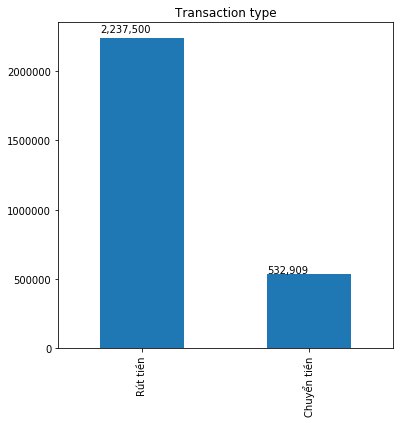

In [0]:
# Tổng quan dữ liệu sau khi lọc dữ liệu
labels = ['Rút tiền', 'Chuyển tiền']
ax = X.type.value_counts().plot(
    kind='bar', title="Transaction type", figsize=(6,6))
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.02))
ax.set_xticklabels(labels)
plt.show()

###Feature Engineering

In [0]:
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]
# Lấy ra các dòng là giao dịch gian lận
Xfraud = X.loc[X.isFraud == 1]
# Lấy ra các dòng là giao dịch không gian lận
XnonFraud = X.loc[X.isFraud == 0]

print('\nTỷ lệ giao dịch gian lận với \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 mặt dù \'amount\' = 0 là: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nTỉ lệ giao dịch không gian lận với \'oldBalanceDest\' = \
newBalanceDest\' = 0 mặt dù \'amount\' = 0 là: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


Tỷ lệ giao dịch gian lận với 'oldBalanceDest' = 'newBalanceDest' = 0 mặt dù 'amount' = 0 là: 0.4955558261293072

Tỉ lệ giao dịch không gian lận với 'oldBalanceDest' = newBalanceDest' = 0 mặt dù 'amount' = 0 là: 0.0006176245277308345


**Nhận xét:**
- Dữ liệu có một số giao dịch với số dư tài khoản đích trước và sau giao dịch đều bằng 0 trong khi sô tiền giao dịch khác 0
- Tỷ của các các giao dịch trên trong dữ liệu:  
    - Với giao dịch gian lận ~ 50%
    - Với giao dịch không gian lận ~ 0.06%

**Kết luận :**
- Có thể nhận thấy số dư tài khoảng đích = 0 là một dấu hiệu mạnh mẽ để phát hiện gian lận. Và việc để = 0 làm cho các thuật toán học máy không hoạt động tốt
=> Thay thế 0 bằng -1 sẽ tốt hơn cho các thuật toán học máy

In [0]:
# ***
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = -1
print('DONE')

DONE


- Tương tự, dữ liệu cũng có một số giao dịch với số dư bằng 0 trong tài khoản gốc cả trước và sau trong khi số tiền giao dịch là khác không. 
- Trong trường hợp này, tỷ lệ của các giao dịch như vậy nhỏ hơn nhiều so với gian lận (0,3%) so với giao dịch chính hãng (47%).

In [0]:
# ***
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = -1 #np.nan
print('DONE')

DONE


####**Tạo 2 thuộc tính mới dựa trên 5 thuộc tính đã có**

In [0]:
# ***
# Tạo 2 thuộc tính mới dựa trên 5 thuộc tính đã có
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg # khác 0 là bất bình thường
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest # khác 0 là bất bình thường

In [0]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,-1.0,-1.00,1,0,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [0]:
len(X)

2770409

Các tính năng mới này hóa ra rất quan trọng trong việc đạt được hiệu suất tốt từ ​​thuật toán ML mà chúng ta sẽ sử dụng. Bảng tương quan giữa các thuộc tính ở bên dưới sẽ chứng minh điều này.

###=>Lưu dữ liệu đã được làm sạch

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
# Dự liệu sau khi làm sạch, chưa xử lý mất cân bằng, dùng để train.
X.to_csv('/content/drive/My Drive/Colab Notebooks/Graduation Thesis/Data/data_raw_train_2.csv')

In [1]:
data.head()

NameError: ignored

##5.Trực quan hóa dữ liệu - Data visualization

Cách tốt nhất để xác nhận rằng dữ liệu chứa đủ thông tin để thuật toán ML có thể đưa ra dự đoán mạnh mẽ, là thử và trực tiếp hình dung sự khác biệt giữa các giao dịch gian lận và giao dịch thật.

In [0]:
# Số lượng dòng dữ liệu
# Mục địch lấy chiều dài dữ liệu ra 1 biến sử dụng nhiều lần -> tiết kiệm bộ nhớ
limit = len(X)

# Function vẽ biểu đồ plot
# Tham số 1: Dữ liệu cho cột hoành độ
# Tham số 2: Dữ liệu cho cột tung độ
# Tham số 3: Loại của dòng dữ liệu
# Tham số 4: Kích thước biểu đồ
def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['Giao dịch bình thường', 'Giao dịch bất thường'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Chuyển tiền', 'Rút tiền'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

###5.1 Phân tán theo thời gian

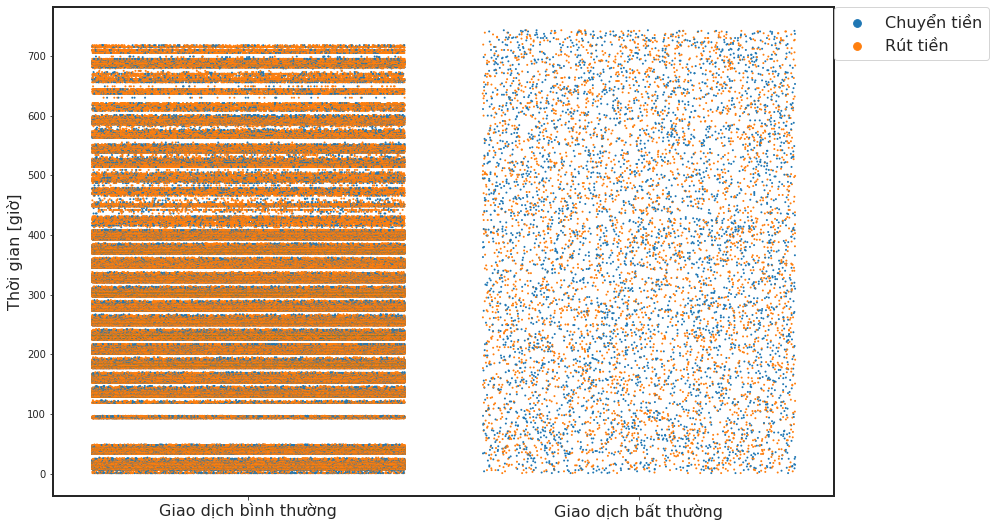

In [0]:
# Cột hoành: phân theo loại giao dịch có giận hay giao dịch bình thường
# Cột tung: phân theo giời gian trong ngày
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('Thời gian [giờ]', size = 16)
ax.set_title('', size = 20);

**Nhận xét:**  
- Dữ liệu không gian lận:
    - Rút tiền vượt trội hơn chuyển tiền
    - Phân phối không đều theo thời gian
- Dữ liệu gian lận:
    - Phân phối đều theo thời gian
    - Số lượng chuyển và rút tiền không chênh lệch nhiều




###5.2 Phân tán theo số tiền giao dịch

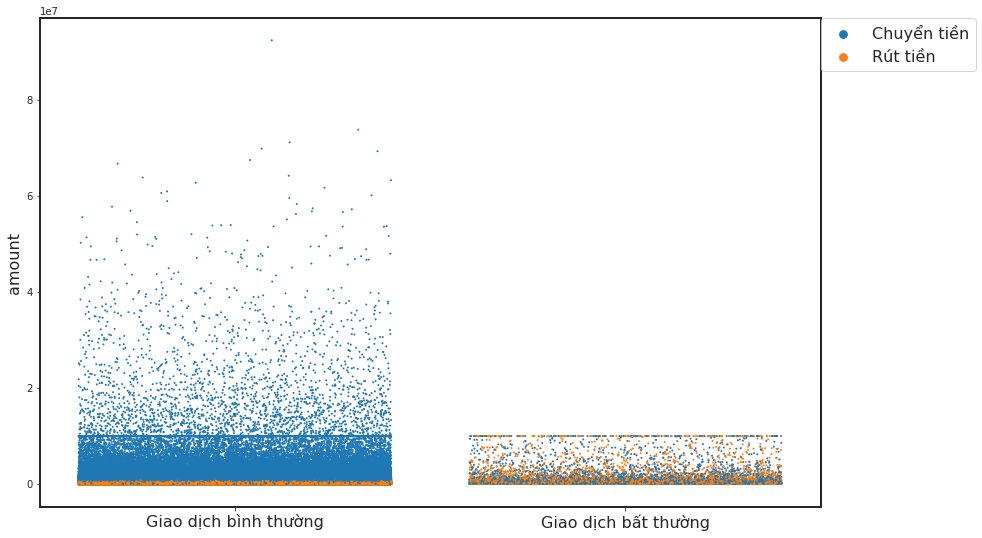

In [0]:
# limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('', size = 18);

###5.3 Phân tán theo số tiền sai trong tài khoản đích

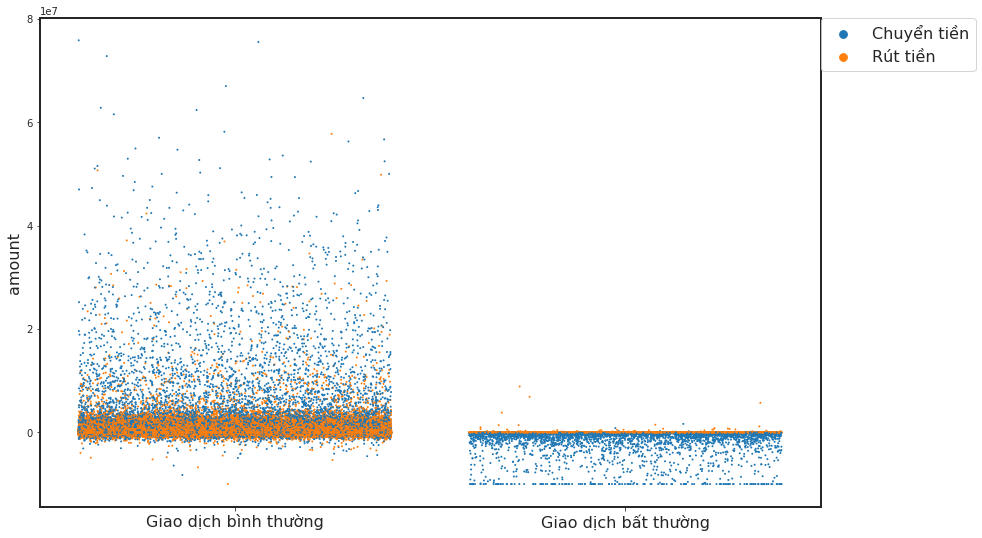

In [0]:
ax = plotStrip(Y[:limit], -X.errorBalanceDest[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('', size = 18);

**Nhận xét:**
- Với giao dịch không gian lận:
    - Thuộc tính 'amount' có mối tương quan lớn với thuộc tính 'errorBalanceOrig'

##6.Xử lý dữ liệu mất cân bằng

In [0]:
X = data_clean

In [0]:
X.head()

,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,381410,17,1,262843.95,20550.0,0.0,296095.09,558939.03,0,242293.95,1.000000e-02
1,1616692,156,1,99083.12,2089.0,0.0,0.00,99083.12,0,96994.12,0.000000e+00
2,4218651,305,1,121679.62,-1.0,-1.0,1125296.45,1246976.07,0,121679.62,-2.328306e-10
3,2664083,210,1,136436.22,-1.0,-1.0,463546.24,599982.46,0,136436.22,0.000000e+00
4,706071,37,1,588003.83,-1.0,-1.0,3517095.30,4105099.14,0,588003.83,-1.000000e-02


In [0]:
# ***
# Tách dữ liệu giao dịch bình thường và giao dịch bất thường
Xfraud = X.loc[X.isFraud == 1]
# Lấy ra các dòng là giao dịch không gian lận
XnonFraud = X.loc[X.isFraud == 0]
XnonFraud = XnonFraud.sample(frac=1, random_state=42)

In [0]:
print('Số giao dịch bất thường', len(Xfraud))
# Tỷ lệ giao dịch bất thường trên tổng số lượng sao dịch
print('Mất cân bằng = {}%'.format(
    round(len(Xfraud) / float(len(X)), 5)*100))

Số giao dịch bất thường 8213
Mất cân bằng = 0.296%


Có thể thấy, sau khi loại bỏ các giao dịch không liên quan và chỉ giữ lại những giao dịch có gian lận. Chỉ có tỉ lệ gian lận thực tế là ~0,3%.
=> Đây là dữ liệu rất mất cân bằng.

Sử lý dữ liệu mất cân bằng theo các phương pháp sau:
- Oversampling
- Undersampling 

###6.1 Random UnderSampling

- Trong giai đoạn này của dự án, chúng tôi sẽ triển khai "Lấy mẫu ngẫu nhiên", về cơ bản bao gồm xóa dữ liệu để có bộ dữ liệu cân bằng hơn và do đó tránh các mô hình của chúng tôi bị quá phù hợp với giao dịch bình thường.

- Nhược điểm của việc lấy mẫu dưới là một mô hình được đào tạo theo cách này sẽ không hoạt động tốt trên dữ liệu kiểm tra sai lệch trong thế giới thực vì hầu như tất cả các thông tin đã bị loại bỏ.  

Các bước thực hiện:
- Đầu tiên chúng ta phải làm là xác định mức độ mất cân bằng của lớp chúng ta.
- Đưa số lượng mẫu không gian lận bằng với số lượng giao dịch gian lận(50/50) => cụ thể là 8213 giao dịch gian lận là 8213 giao dịch không gian lận.
- Sau khi đã có tập dữ liệu, chúng tôi xáo trộn dữ liệu, mục đích để xem liệu mô hình của chúng tôi có duy trì được độ chính xác ổn định hay không.

In [0]:
# ***
# lấy ra 8213 giao dịch bình thường
non_fraud_df = XnonFraud[:8213]

# Gộp dữ liệu bất thường là bình thường
normal_distributed_df = pd.concat([Xfraud, non_fraud_df])

# xáo trộn dữ liệu
df_with_underspampling = normal_distributed_df.sample(frac=1, random_state=42)
df_with_underspampling = df_with_underspampling.iloc[:,1:]

print('Số giao dịch còn lại: {}'.format(len(df_with_underspampling)))
df_with_underspampling.head()

Số giao dịch còn lại: 16426


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
615727,277,1,322907.44,-1.00,-1.0,593694.99,916602.43,0,322907.44,-1.164153e-10
497782,336,0,195255.28,8875.00,0.0,92278.38,287533.66,0,186380.28,5.820766e-11
400705,343,1,802417.45,802417.45,0.0,49645.31,852062.77,1,0.00,-1.000000e-02
2018388,241,0,57734.59,57734.59,0.0,-1.00,-1.00,1,0.00,5.773459e+04
2172362,99,1,286670.90,286670.90,0.0,1028298.11,1314969.01,1,0.00,0.000000e+00


**Nhận xét:**
- Phương pháp lấy mẫu ngẫu nhiên có thể xử lý dữ liệu mất cân bằng. Tuy nhiên nó cũng mang lại nhiều rủi ro cho mô hình của chúng tôi vì có rất nhiều thông tin bị mất trong dữ liệu lượt bỏ (information loss).

**Bây giờ chúng ta đã cân bằng chính xác tập dữ liệu của mình, chúng ta có thể bắc đầu với phân tích và tiền xử lý dữ liệu trên dữ liệu mới.**

Phân phối các lớp trong tập dữ liệu mẫu
1    0.5
0    0.5
Name: isFraud, dtype: float64


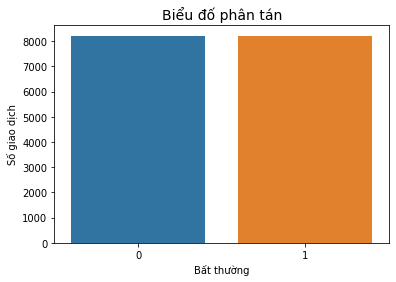

In [0]:
print('Phân phối các lớp trong tập dữ liệu mẫu')
print(df_with_underspampling['isFraud'].value_counts()/len(df_with_underspampling))

sns.countplot('isFraud', data=df_with_underspampling)
plt.title('Biểu đố phân tán', fontsize=14)
plt.xlabel('Bất thường')
plt.ylabel('Số giao dịch')
plt.show()

###6.2 Random OverSampling

**Oversampling**: làm tăng trọng số của lớp thiểu số bằng cách sao chép các ví dụ của lớp thiểu số.  Mặc dù nó không làm tăng thông tin, nhưng nó làm tăng vấn đề quá khớp, khiến cho mô hình quá cụ thể.  Nó cũng có thể là trường hợp độ chính xác cho tập huấn luyện là cao, nhưng hiệu suất cho các bộ dữ liệu mới thực sự kém hơn. 

**Quá khổ ngẫu nhiên (random oversampling)**
- Quá khổ ngẫu nhiên đơn giản là sao chép ngẫu nhiên các ví dụ lớp thiểu số.  
- Quá khổ ngẫu nhiên được biết là làm tăng khả năng xảy ra quá mức.
- Mặt khác, nhược điểm lớn của việc lấy mẫu ngẫu nhiên là phương pháp này có thể loại bỏ dữ liệu hữu ích.


In [0]:
# ***
# Dữ liệu đã làm sạch: data_clean
# Tách dữ liệu giao dịch bình thường và giao dịch bất thường
y_rs = data_clean['isFraud']
# Lấy ra các dòng là giao dịch bình thường
X_rs = data_clean.drop(['isFraud'], axis = 1)
name_x = X_rs.columns

In [0]:
# RandomOverSampler: reference https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html
sampler = RandomOverSampler(random_state=42)
X_rs, y_rs = sampler.fit_sample(X_rs, y_rs)
print('RandomOverSampler {}'.format(Counter(y_rs)))

RandomOverSampler Counter({0: 2762196, 1: 2762196})


In [0]:
# Chuyển dữ liệu ndarray to DataFrame
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs)
X_rs = X_rs.iloc[:,1:]
X_rs.columns = name_x[1:]
y_rs.columns = ['isFraud']

In [0]:
# Gộp dữ liệu bất thường và bình thường
normal_distributed_df = pd.concat([X_rs, y_rs], axis=1)
# xáo trộn dữ liệu
df_with_overspampling = normal_distributed_df.sample(frac=1, random_state=42)

In [0]:
df_with_overspampling.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,isFraud
1980434,331.0,1.0,139424.89,-1.00,-1.0,553115.08,692539.97,139424.89,0.00,0
4643802,26.0,1.0,37065.55,37065.55,0.0,1396327.66,1433393.21,0.00,0.00,1
1934508,135.0,1.0,520593.63,-1.00,-1.0,3780877.21,4557483.47,520593.63,-256012.63,0
5442216,390.0,0.0,1084144.37,1084144.37,0.0,-1.00,-1.00,0.00,1084144.37,1
2906542,520.0,0.0,5469910.99,5469910.99,0.0,-1.00,-1.00,0.00,5469910.99,1


Phân phối các lớp trong tập dữ liệu mẫu
1    0.5
0    0.5
Name: isFraud, dtype: float64


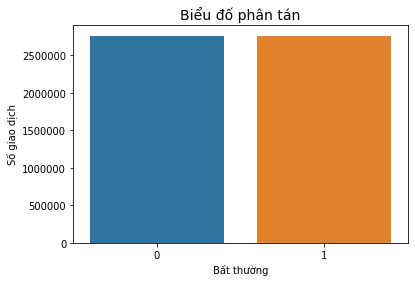

In [0]:
print('Phân phối các lớp trong tập dữ liệu mẫu')
print(df_with_overspampling['isFraud'].value_counts()/len(df_with_overspampling))

sns.countplot('isFraud', data=df_with_overspampling)
plt.title('Biểu đố phân tán', fontsize=14)
plt.xlabel('Bất thường')
plt.ylabel('Số giao dịch')
plt.show()

###6.3 Ma trận tương quan(Correlation Matrices)

- Chúng tôi muốn biết liệu có những tính năng có ảnh hưởng lớn đến việc một giao dịch cụ thể có phải là lừa đảo hay không. Tuy nhiên, điều quan trọng là chúng tôi sử dụng đúng khung dữ liệu (tập mẫu) để chúng tôi xem các tính năng nào có mối tương quan tích cực hoặc tiêu cực cao liên quan đến các giao dịch gian lận.
- Ma trận tương quan là một ma trận thể hiện các hệ số tương quan giữa các biến. Mỗi ô trong bảng hiển thị mối tương quan giữa hai biến. 
- Một ma trận tương quan được sử dụng để tóm tắt dữ liệu, làm đầu vào cho một phân tích nâng cao hơn và như một chẩn đoán cho các phân tích nâng cao.

#### 6.3.1 Dữ liệu chưa xử lý cân bằng

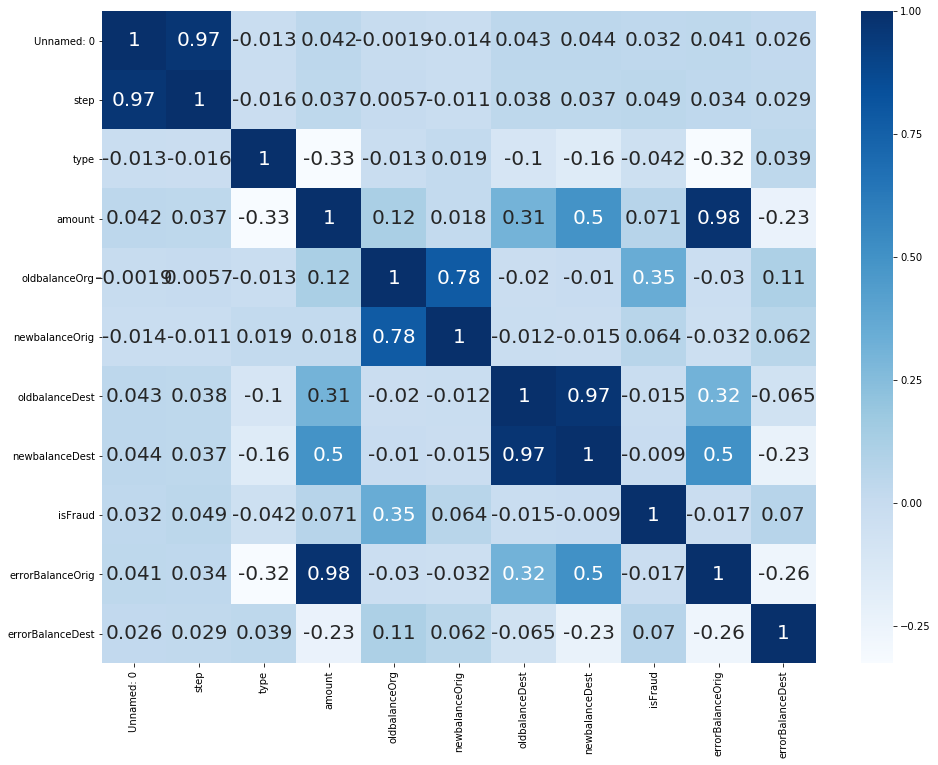

In [0]:
# Ma trận tương quan với dữ liệu mất cân bằng(dữ liệu gốc)
# calculate the correlation matrix
corr = data_clean.corr()
# plot the heatmap
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='Blues', annot_kws={'size':20})
plt.show()

#### 6.3.2 Dữ liệu cân bằng theo phương pháp UnderSampling


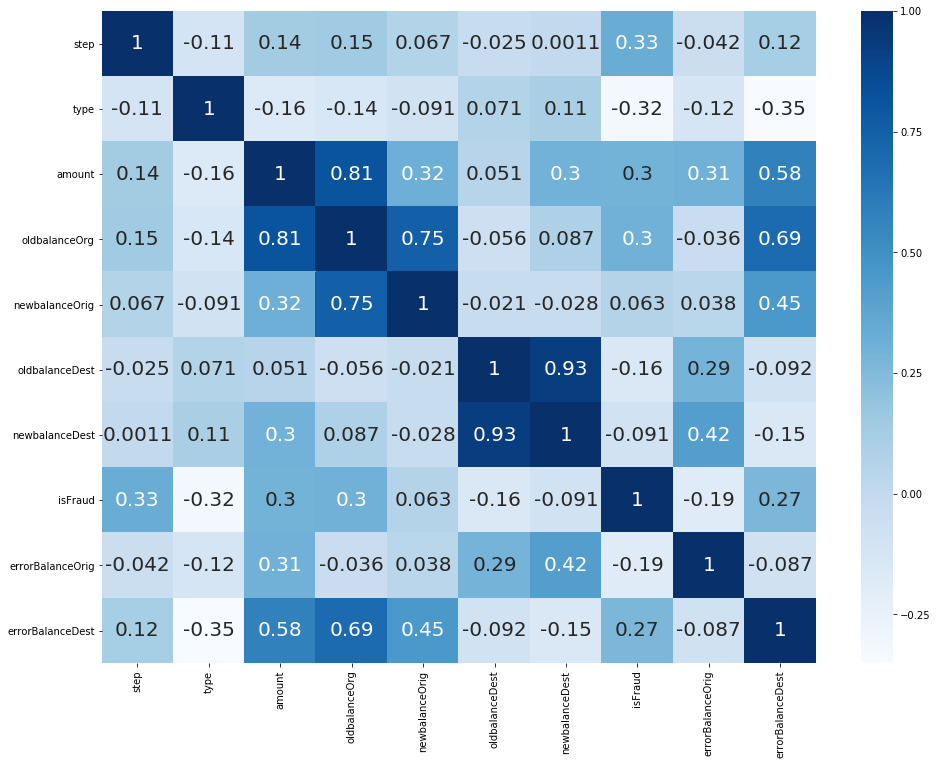

In [0]:
# Ma trận tương quan với dữ liệu cân bằng theo phương pháp UnderSampling
# calculate the correlation matrix
corr = df_with_underspampling.corr()
# plot the heatmap
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='Blues', annot_kws={'size':20})
plt.show()

**Nhận xét:**

- Tương quan âm: có thể thấy thuôc tính 'errorBalanceOrig', 'newbalanceDest' có tượng quan ngược cao nhất với biến phân loại của chúng ta.
- Lưu ý rằng các giá trị này càng thấp thì kết quả cuối cùng sẽ là một giao dịch gian lận.
- BoxPlots: Chúng tôi sẽ sử dụng các biểu đồ boxplots để hiểu rõ hơn về việc phân phối các tính năng này trong các giao dịch gian lận và không gian lận.

#### 6.3.3 Dữ liệu cân bằng theo phương pháp OverSampling


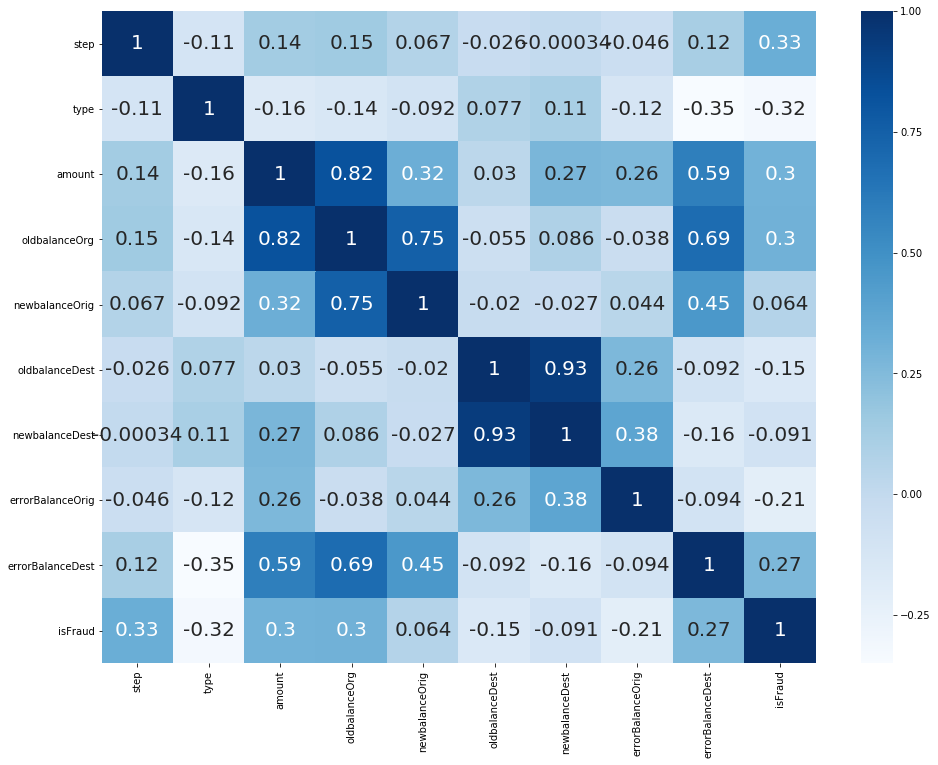

In [0]:
# Ma trận tương quan với dữ liệu cân bằng theo phương pháp OverSampling
# calculate the correlation matrix
corr = df_with_overspampling.corr()
# plot the heatmap
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='Blues', annot_kws={'size':20})
plt.show()

###6.4 Phát hiện bất thường - Loại bỏ ngoại lệ(Anomaly Detection)

- Mục đích chính của chúng tôi trong phần này là loại bỏ "các dữ liệu ngoại vị" khỏi các tính năng có mối tương quan cao với các lớp của chúng tôi.
- Điều này sẽ có tác động tích cực đến độ chính xác của các mô hình của chúng tôi.

- Chúng ta phải cẩn thận về ngưỡng mà chúng ta muốn loại bỏ để loại bỏ các ngoại lệ. 
- Chúng tôi xác định ngưỡng bằng cách nhân một số (ví dụ: 1,5) với (Phạm vi liên dải). Ngưỡng này càng cao, càng ít ngoại lệ sẽ phát hiện (nhân với số cao hơn ex: 3) và ngưỡng này càng thấp thì càng phát hiện ra nhiều ngoại lệ.

**Sự cân bằng:** 
- chúng tôi muốn tập trung nhiều hơn vào "các ngoại lệ cực đoan" thay vì chỉ các ngoại lệ. 
- Bởi vì chúng tôi có thể gặp rủi ro mất thông tin, điều này sẽ khiến các mô hình của chúng tôi có độ chính xác thấp hơn. 
- Xem 'ngưỡng'(threshold) nó ảnh hưởng đến độ chính xác của các mô hình phân loại của chúng tôi như thế nào.

####6.4.1 Phân phối trước khi loại bỏ giá trị ngoại vi

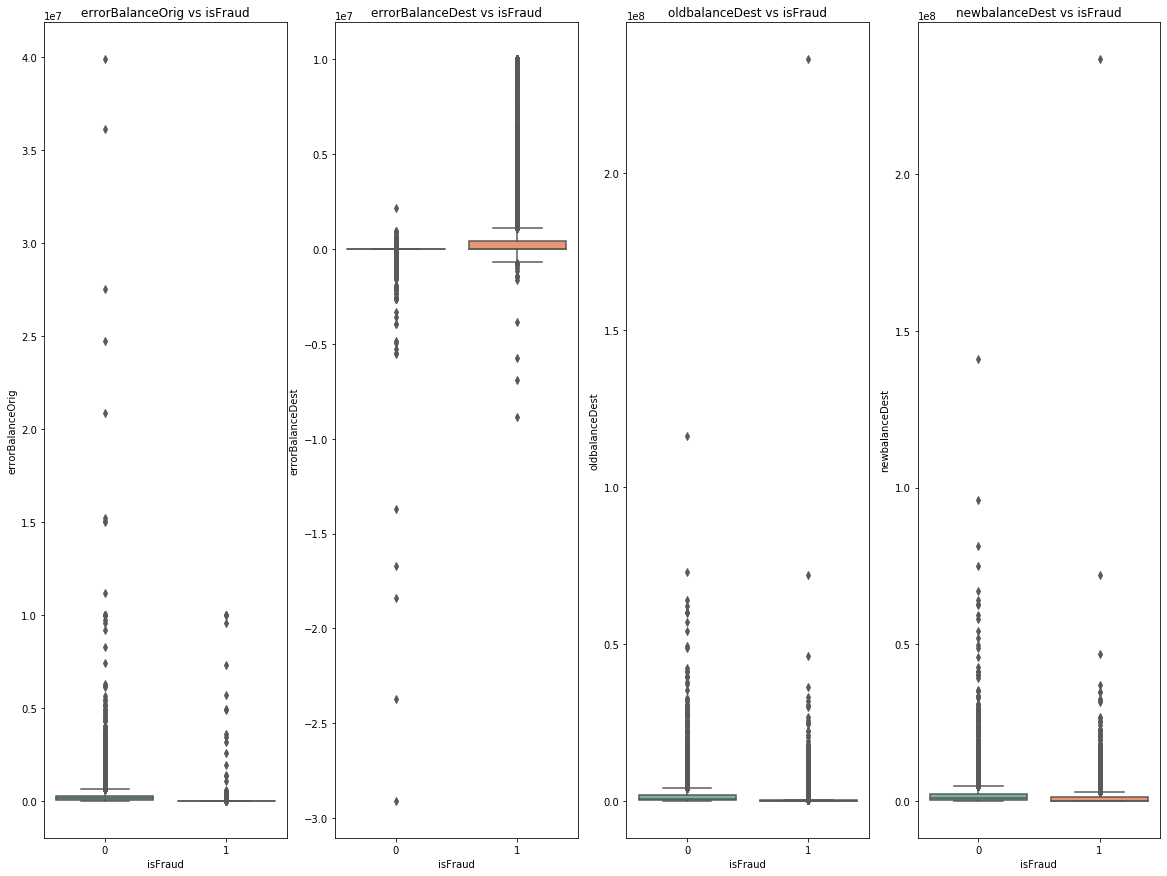

In [0]:
# ***
# UNDERSAMPLING
f, axes = plt.subplots(ncols=4, figsize=(20,15))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="isFraud", y="errorBalanceOrig", data=df_with_underspampling, ax=axes[0], palette="Set2")
axes[0].set_title('errorBalanceOrig vs isFraud')

sns.boxplot(x="isFraud", y="errorBalanceDest", data=df_with_underspampling, ax=axes[1], palette="Set2")
axes[1].set_title('errorBalanceDest vs isFraud')

sns.boxplot(x="isFraud", y="oldbalanceDest", data=df_with_underspampling, ax=axes[2], palette="Set2")
axes[2].set_title('oldbalanceDest vs isFraud')

sns.boxplot(x="isFraud", y="newbalanceDest", data=df_with_underspampling, ax=axes[3], palette="Set2")
axes[3].set_title('newbalanceDest vs isFraud')

plt.show()

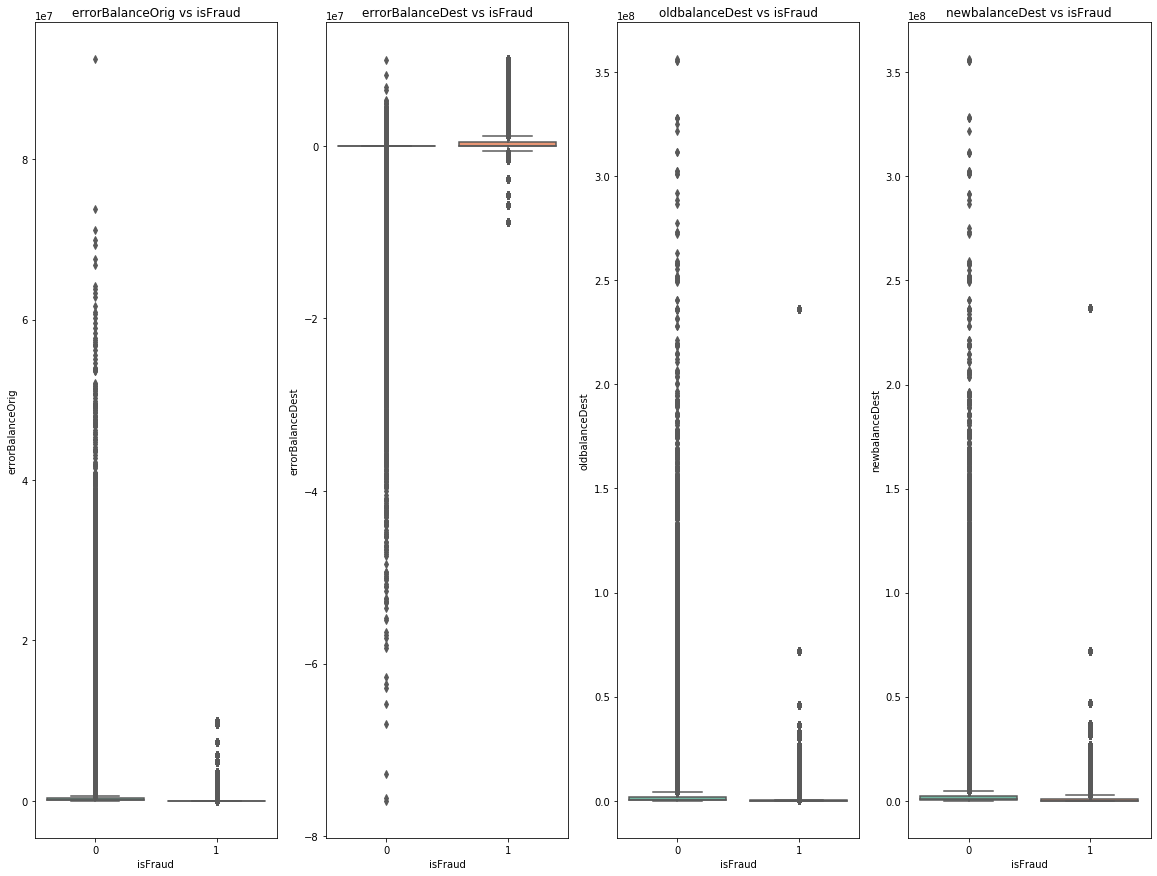

In [0]:
# ***
# OVERSAMPLING
f, axes = plt.subplots(ncols=4, figsize=(20,15))

sns.boxplot(x="isFraud", y="errorBalanceOrig", data=df_with_overspampling, ax=axes[0], palette="Set2")
axes[0].set_title('errorBalanceOrig vs isFraud')

sns.boxplot(x="isFraud", y="errorBalanceDest", data=df_with_overspampling, ax=axes[1], palette="Set2")
axes[1].set_title('errorBalanceDest vs isFraud')

sns.boxplot(x="isFraud", y="oldbalanceDest", data=df_with_overspampling, ax=axes[2], palette="Set2")
axes[2].set_title('oldbalanceDest vs isFraud')

sns.boxplot(x="isFraud", y="newbalanceDest", data=df_with_overspampling, ax=axes[3], palette="Set2")
axes[3].set_title('newbalanceDest vs isFraud')

plt.show()

####6.4.2 Loại bỏ giá trị ngoại vi

#####6.4.2.1 UNDERSAMPLING

In [0]:
# ***
errorBalanceOrig_fraud = df_with_underspampling['errorBalanceOrig'].loc[df_with_underspampling['isFraud'] == 1].values
# Bách phân vị 25%, 75%
q25, q75 = np.percentile(errorBalanceOrig_fraud, 25), np.percentile(errorBalanceOrig_fraud, 75)
print('Bách phân vị 25: {} | Bách phân vị 75: {}'.format(q25, q75))
# Phạm vi liên vùng
errorBalanceOrig_iqr = q75 - q25
print('iqr: {}'.format(errorBalanceOrig_iqr))

# Tham số ngưỡng chúng tôi chọn là '1.5'
errorBalanceOrig_cut_off = errorBalanceOrig_iqr * 1.5
# Giá trị biên dưới, biên trên
errorBalanceOrig_lower, errorBalanceOrig_upper = q25 - errorBalanceOrig_cut_off, q75 + errorBalanceOrig_cut_off
# print('Các giá trị ngoại vi: {}'.format(errorBalanceOrig_cut_off))
print('Biên dưới: {}'.format(errorBalanceOrig_lower))
print('Biên trên: {}'.format(errorBalanceOrig_upper))

# Dữ liệu ngoại vi
outliers = [x for x in errorBalanceOrig_fraud if x < errorBalanceOrig_lower or x > errorBalanceOrig_upper]
print('Tính năng \'errorBalanceOrig\' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: {}'.format(len(outliers)))
print('Giá trị ngoại vi:{}'.format(outliers))
print('Số lượng giá trị ngoại vi:{}'.format(len(outliers)))
# Loại bỏ dữ liệu là ngoại vi
df_with_underspampling = df_with_underspampling.drop(df_with_underspampling[(df_with_underspampling['errorBalanceOrig'] > errorBalanceOrig_upper) | (df_with_underspampling['errorBalanceOrig'] < errorBalanceOrig_lower)].index)
print('----' * 44)

Bách phân vị 25: 0.0 | Bách phân vị 75: 0.0
iqr: 0.0
Biên dưới: 0.0
Biên trên: 0.0
Tính năng 'errorBalanceOrig' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: 57
Giá trị ngoại vi:[23292.3, 332729.54, 43728.5, 3.725290298461914e-09, 3441041.46, 181728.11, 85065.86, 399045.0800000001, 3.725290298461914e-09, 122101.57, 416001.33, 9999999.999999998, 4953893.08, 454859.39, -3.725290298461914e-09, 229909.57, 4892193.09, 1078013.76, 3.725290298461914e-09, 277970.88, 353874.22, 291519.84, 3.725290298461914e-09, 94372.61, 1343002.08, 10000000.0, 202978.65, 7.450580596923828e-09, 7316255.050000002, 238295.11, 112280.88, 5674547.89, 40611.22, 222048.71, 112486.46, 1395850.55, 536624.41, 3576297.1, 3.725290298461914e-09, 95428.32, -7.450580596923828e-09, 128343.56, 10000000.0, -1.862645149230957e-09, 1.862645149230957e-09, 508782.2, 3171085.59, 149668.66, 407005.78, 1933920.8, 234377.29, 2542664.27, 39713.28, -2.3283064365386963e-10, 9585040.37, 577418.98, -3.725290298461914e-09]
------

In [0]:
# ***
# -----> Thực hiện tương tự
errorBalanceDest_fraud = new_df['errorBalanceDest'].loc[new_df['isFraud'] == 1].values
q25, q75 = np.percentile(errorBalanceDest_fraud, 25), np.percentile(errorBalanceDest_fraud, 75)
errorBalanceDest_iqr = q75 - q25

errorBalanceDest_cut_off = errorBalanceDest_iqr * 1.5
errorBalanceDest_lower, errorBalanceDest_upper = q25 - errorBalanceDest_cut_off, q75 + errorBalanceDest_cut_off
print('Biên dưới: {}'.format(errorBalanceDest_lower))
print('Biên trên: {}'.format(errorBalanceDest_upper))
outliers = [x for x in errorBalanceDest_fraud if x < errorBalanceDest_lower or x > errorBalanceDest_upper]
print('Giá trị ngoại vi: {}'.format(outliers))
print('Tính năng \'errorBalanceDest\' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['errorBalanceDest'] > errorBalanceDest_upper) | (new_df['errorBalanceDest'] < errorBalanceDest_lower)].index)
print('Số giao dịch còn lại sau khi lượt bỏ: {}'.format(len(new_df)))
print('----' * 44)


# Với thuộc tính 'oldbalanceDest'
oldbalanceDest_fraud = new_df['oldbalanceDest'].loc[new_df['isFraud'] == 1].values
q25, q75 = np.percentile(oldbalanceDest_fraud, 25), np.percentile(oldbalanceDest_fraud, 75)

oldbalanceDest_iqr = q75 - q25

oldbalanceDest_cut_off = oldbalanceDest_iqr * 1.5
oldbalanceDest_lower, oldbalanceDest_upper = q25 - oldbalanceDest_cut_off, q75 + oldbalanceDest_cut_off
print('Biên dưới: {}'.format(oldbalanceDest_lower))
print('Biên trên: {}'.format(oldbalanceDest_upper))
outliers = [x for x in oldbalanceDest_fraud if x < oldbalanceDest_lower or x > oldbalanceDest_upper]
print('oldbalanceDest outliers: {}'.format(outliers))
print('Tính năng \'oldbalanceDest\' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['oldbalanceDest'] > oldbalanceDest_upper) | (new_df['oldbalanceDest'] < oldbalanceDest_lower)].index)
print('Số giao dịch còn lại sau khi lượt bỏ: {}'.format(len(new_df)))

Biên dưới: -657400.6762499999
Biên trên: 1095667.7937499997
Giá trị ngoại vi: [1965786.11, 10000000.0, 6249265.86, 1592602.27, 1314897.11, 1340263.67, 3580542.06, 1150717.15, 6870369.62, 9168747.51, 5429153.98, 1600721.32, 1669143.57, 5777706.65, 2178303.49, 1754597.44, 2299330.46, 6961359.11, 10000000.0, 10000000.0, 1715635.41, 1167816.02, 8286342.51, 1380940.73, 1494831.65, 1284959.39, 3332748.16, 1097309.24, 2155569.91, 9887819.06, 1170213.18, 1367340.03, 1518718.03, 2607790.58, 1150561.97, 1214511.61, 2231580.5, 3644234.06, 1421665.98, -1645042.09, 1368391.5, 1732090.28, 6322399.97, 1989311.31, 1165187.89, 4445514.2, -992181.89, 6311409.28, 5016884.33, 3178915.22, 1137603.28, 2184556.65, 6183238.55, 1489916.19, 1501341.87, 1654055.02, 2393539.65, 9060955.18, 2477661.97, 1697093.54, 2739248.3, -833927.3300000001, 1299860.86, 6545346.16, 2216437.25, 3490916.0, 1268931.21, 1685692.11, 10000000.0, 10000000.0, 10000000.0, 3424092.39, 2642116.95, 1465173.76, 2123610.45, 1742012.06, 14316

#####6.4.2.1 OVERSAMPLING

In [0]:
# ***
errorBalanceOrig_fraud = df_with_overspampling['errorBalanceOrig'].loc[df_with_overspampling['isFraud'] == 1].values
# Bách phân vị 25%, 75%
q25, q75 = np.percentile(errorBalanceOrig_fraud, 25), np.percentile(errorBalanceOrig_fraud, 75)
print('Bách phân vị 25: {} | Bách phân vị 75: {}'.format(q25, q75))
# Phạm vi liên vùng
errorBalanceOrig_iqr = q75 - q25
print('iqr: {}'.format(errorBalanceOrig_iqr))

# Tham số ngưỡng chúng tôi chọn là '1.5'
errorBalanceOrig_cut_off = errorBalanceOrig_iqr * 1.5
# Giá trị biên dưới, biên trên
errorBalanceOrig_lower, errorBalanceOrig_upper = q25 - errorBalanceOrig_cut_off, q75 + errorBalanceOrig_cut_off
# print('Các giá trị ngoại vi: {}'.format(errorBalanceOrig_cut_off))
print('Biên dưới: {}'.format(errorBalanceOrig_lower))
print('Biên trên: {}'.format(errorBalanceOrig_upper))

# Dữ liệu ngoại vi
outliers = [x for x in errorBalanceOrig_fraud if x < errorBalanceOrig_lower or x > errorBalanceOrig_upper]
print('Tính năng \'errorBalanceOrig\' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: {}'.format(len(outliers)))
# print('Giá trị ngoại vi:{}'.format(outliers))
# Loại bỏ dữ liệu là ngoại vi
df_with_overspampling = df_with_overspampling.drop(
    df_with_overspampling[(
        df_with_overspampling['errorBalanceOrig'] > errorBalanceOrig_upper) | (df_with_overspampling['errorBalanceOrig'] < errorBalanceOrig_lower)].index)
print('----' * 44)

Bách phân vị 25: 0.0 | Bách phân vị 75: 0.0
iqr: 0.0
Biên dưới: 0.0
Biên trên: 0.0
Tính năng 'errorBalanceOrig' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: 0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [0]:
# ***
# -----> Thực hiện tương tự
errorBalanceDest_fraud = df_with_overspampling['errorBalanceDest'].loc[df_with_overspampling['isFraud'] == 1].values
q25, q75 = np.percentile(errorBalanceDest_fraud, 25), np.percentile(errorBalanceDest_fraud, 75)
errorBalanceDest_iqr = q75 - q25

errorBalanceDest_cut_off = errorBalanceDest_iqr * 1.5
errorBalanceDest_lower, errorBalanceDest_upper = q25 - errorBalanceDest_cut_off, q75 + errorBalanceDest_cut_off
print('Biên dưới: {}'.format(errorBalanceDest_lower))
print('Biên trên: {}'.format(errorBalanceDest_upper))
outliers = [x for x in errorBalanceDest_fraud if x < errorBalanceDest_lower or x > errorBalanceDest_upper]
print('Tính năng \'errorBalanceDest\' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: {}'.format(len(outliers)))
df_with_overspampling = df_with_overspampling.drop(df_with_overspampling[(
    df_with_overspampling['errorBalanceDest'] > errorBalanceDest_upper) | (df_with_overspampling['errorBalanceDest'] < errorBalanceDest_lower)].index)
print('Số giao dịch còn lại sau khi lượt bỏ: {}'.format(len(df_with_overspampling)))
print('----' * 44)


# Với thuộc tính 'oldbalanceDest'
oldbalanceDest_fraud = df_with_overspampling['oldbalanceDest'].loc[df_with_overspampling['isFraud'] == 1].values
q25, q75 = np.percentile(oldbalanceDest_fraud, 25), np.percentile(oldbalanceDest_fraud, 75)
oldbalanceDest_iqr = q75 - q25

oldbalanceDest_cut_off = oldbalanceDest_iqr * 1.5
oldbalanceDest_lower, oldbalanceDest_upper = q25 - oldbalanceDest_cut_off, q75 + oldbalanceDest_cut_off
print('Biên dưới: {}'.format(oldbalanceDest_lower))
print('Biên trên: {}'.format(oldbalanceDest_upper))
outliers = [x for x in oldbalanceDest_fraud if x < oldbalanceDest_lower or x > oldbalanceDest_upper]
print('Tính năng \'oldbalanceDest\' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: {}'.format(len(outliers)))
df_with_overspampling = df_with_overspampling.drop(df_with_overspampling[(
    df_with_overspampling['oldbalanceDest'] > oldbalanceDest_upper) | (df_with_overspampling['oldbalanceDest'] < oldbalanceDest_lower)].index)
print('Số giao dịch còn lại sau khi lượt bỏ: {}'.format(len(df_with_overspampling)))

Biên dưới: -106045.11000000002
Biên trên: 176741.85000000003
Tính năng 'errorBalanceDest' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: 211014
Số giao dịch còn lại sau khi lượt bỏ: 1642979
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Biên dưới: -217105.735
Biên trên: 361840.225
Tính năng 'oldbalanceDest' có giá trị ngoại vi cho trường hợp là giao dịch gian lận: 188207
Số giao dịch còn lại sau khi lượt bỏ: 1418939


####6.3.2 Phân phối sau phi bỏ giá trị ngoại vi

#####6.5.3.1 UNDERSAMPLING

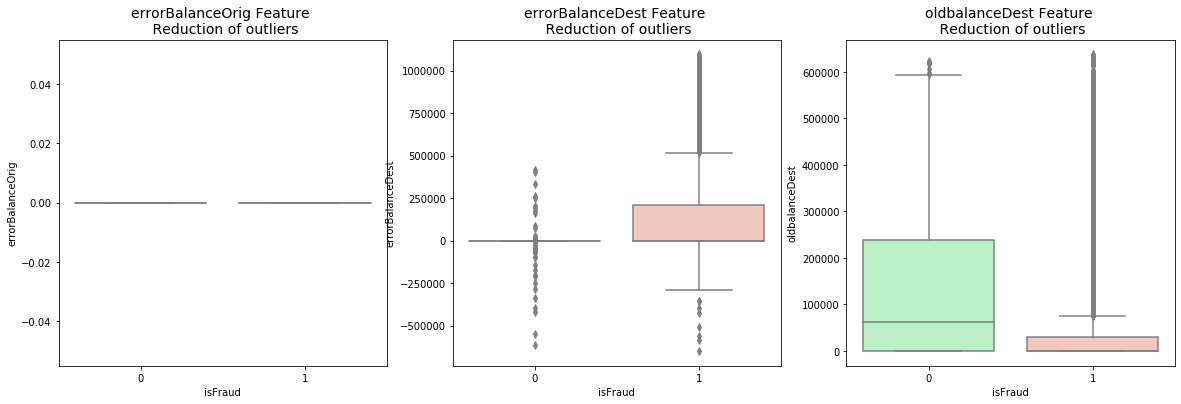

In [0]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots với dữ liệu không dữ liệu ngoại vi đã được lượt bỏ
# Feature errorBalanceOrig
sns.boxplot(x="isFraud", y="errorBalanceOrig", data=new_df,ax=ax1, palette=colors)
ax1.set_title("errorBalanceOrig Feature \n Reduction of outliers", fontsize=14)

# # Feature errorBalanceDest
sns.boxplot(x="isFraud", y="errorBalanceDest", data=new_df, ax=ax2, palette=colors)
ax2.set_title("errorBalanceDest Feature \n Reduction of outliers", fontsize=14)

# # Feature oldbalanceDest
sns.boxplot(x="isFraud", y="oldbalanceDest", data=new_df, ax=ax3, palette=colors)
ax3.set_title("oldbalanceDest Feature \n Reduction of outliers", fontsize=14)

plt.show()

#####6.5.3.1 OVERSAMPLING

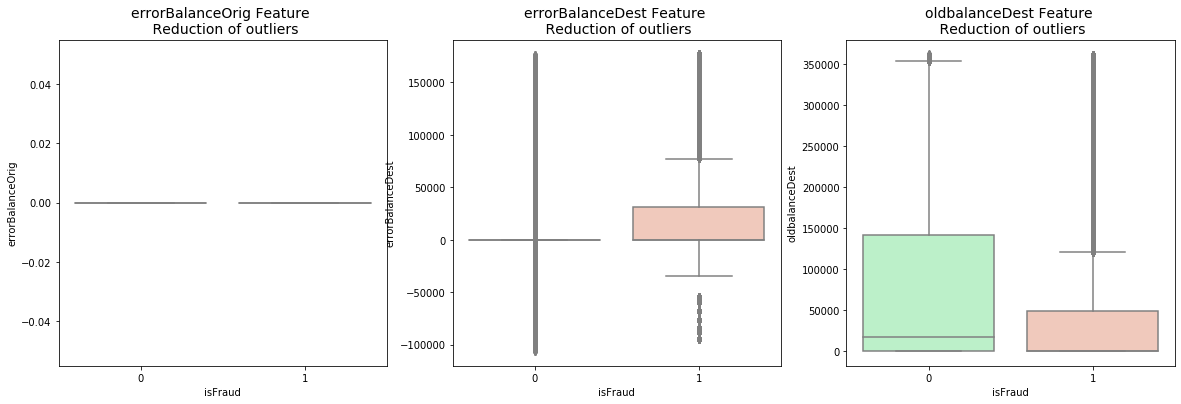

In [0]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots với dữ liệu không dữ liệu ngoại vi đã được lượt bỏ
# Feature errorBalanceOrig
sns.boxplot(x="isFraud", y="errorBalanceOrig", data=df_with_overspampling,ax=ax1, palette=colors)
ax1.set_title("errorBalanceOrig Feature \n Reduction of outliers", fontsize=14)

# # Feature errorBalanceDest
sns.boxplot(x="isFraud", y="errorBalanceDest", data=df_with_overspampling, ax=ax2, palette=colors)
ax2.set_title("errorBalanceDest Feature \n Reduction of outliers", fontsize=14)

# # Feature oldbalanceDest
sns.boxplot(x="isFraud", y="oldbalanceDest", data=df_with_overspampling, ax=ax3, palette=colors)
ax3.set_title("oldbalanceDest Feature \n Reduction of outliers", fontsize=14)

plt.show()

###6.6 Lưu dữ liệu sau khi thực hiện cân bằng dữ liệu


In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


####6.6.1 UNDERSAMPLING

In [0]:
# Dự liệu sau khi làm sạch bằng undersamping, dùng để train.
new_df.to_csv('/content/drive/My Drive/Colab Notebooks/Graduation Thesis/Data/data_under_sampling.csv')
print('=====DONE=====')

####6.6.2 OVERSAMPLING

In [0]:
# Dự liệu sau khi làm sạch bằng oversamping, dùng để train.
df_with_overspampling.to_csv('/content/drive/My Drive/Colab Notebooks/Graduation Thesis/Data/data_over_sampling.csv')
print('=====DONE=====')

=====DONE=====


##7.Mô hình phát hiện gian lận với dữ liệu mất cân bằng

In [0]:
# Bỏ qua nếu lấy dữ liệu trực tiếp (không cần qua quá trình chỉnh làm sạch)
data_train = X

In [0]:
data_train.head()

,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,381410,17,1,262843.95,20550.0,0.0,296095.09,558939.03,0,242293.95,1.000000e-02
1,1616692,156,1,99083.12,2089.0,0.0,0.00,99083.12,0,96994.12,0.000000e+00
2,4218651,305,1,121679.62,-1.0,-1.0,1125296.45,1246976.07,0,121679.62,-2.328306e-10
3,2664083,210,1,136436.22,-1.0,-1.0,463546.24,599982.46,0,136436.22,0.000000e+00
4,706071,37,1,588003.83,-1.0,-1.0,3517095.30,4105099.14,0,588003.83,-1.000000e-02


In [0]:
df_with_overspampling['isFraud'].count_values

AttributeError: ignored

In [0]:
data_under_sampling.head()

,Unnamed: 0,Unnamed: 0.1,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,400705,4785673,343,1,802417.45,802417.45,0.0,49645.31,852062.77,1,0.0,-0.01
1,2018388,3192449,241,0,57734.59,57734.59,0.0,-1.00,-1.00,1,0.0,57734.59
2,1062282,142088,11,1,12461.00,12461.00,0.0,27964.11,40425.11,1,0.0,0.00
3,2561624,5099867,355,1,42483.97,42483.97,0.0,51495.75,93979.72,1,0.0,0.00
4,71426,6118821,537,0,34238.20,34238.20,0.0,-1.00,-1.00,1,0.0,34238.20


In [0]:
len(data_under_sampling)

6225

In [0]:
print('Sô lượng giao dịch với overspling: ', len(df_with_overspampling))
df_with_overspampling.head()

Sô lượng giao dịch với overspling:  1418939


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,isFraud
3481951,576.0,1.0,451399.66,451399.66,0.00,215513.02,666912.68,0.0,-1.164153e-10,1
1494917,178.0,1.0,408401.45,689392.00,280990.55,147126.43,555527.88,0.0,0.000000e+00,0
4494752,496.0,0.0,174725.11,174725.11,0.00,-1.00,-1.00,0.0,1.747251e+05,1
4345240,273.0,0.0,76642.85,76642.85,0.00,-1.00,-1.00,0.0,7.664285e+04,1
4593205,4.0,0.0,169941.73,169941.73,0.00,-1.00,-1.00,0.0,1.699417e+05,1


###Các thuật toán sẽ tiếp cận

**Các thuật toán Lựa chọn để huấn luyện:**
- Random Forest
- ***Extreme Gradient Boosting (EGB).***

####Tách dữ liệu thành tập huấn luyện và tập kiểm thử
- Tách theo tỷ lệ 80:20 (train - test)

In [0]:
# Tách các thuộc tính độc lập và thuộc tính phụ thuộc
y = data_train['isFraud']
X = data_train.drop('isFraud', axis=1)

# Chia tập dữ liệu 2 phân: tập huấn luyện và tập kiểm thử 
# Tỷ lệ: train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Chuyển các giá trị thành 1 mảng để đưa vào các thuật toán
# thuật toán XGBoost không cần thực hiện chuyển đổi này
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [0]:
# Hàm vẽ confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###7.1 Thuật toán Rừng Ngẫu Nhiên Random Forest


#####7.1.1 Với dữ liệu chưa xử lý cân bằng

In [0]:
# Load data
# data = pd.read_csv('data_name.csv', index_col=0)
data_clean = data_clean.iloc[:, 1:]
X = data_clean.drop('isFraud', axis=1)
y = data_clean['isFraud']

In [0]:
# Tách dữ liệu thành train set và test set
# Chúng tôi sẽ sử dụng xác thực chéo trên tập huấn luyện để điều chỉnh các tham số, sau đó kiểm tra dữ liệu chưa xem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [0]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

0    2762196
1       8213
Name: isFraud, dtype: int64
0    2209757
1       6570
Name: isFraud, dtype: int64
0    552439
1      1643
Name: isFraud, dtype: int64


In [0]:
# Mô hình
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_features='sqrt', random_state=42)
# Danh sách confusion matrix của từng lần KFold
conf_matrix_list_of_arrays = []
conf_matrix_list_of_arrays_test_set = []
# Danh sách độ chính xác của từng lần KFold trên dữ liệu test
accuracy_models = []
accuracy_test_set = []
f1_score_train = []
f1_score_test = []
# KFold = 3
kf = StratifiedKFold(n_splits=3)
kf.get_n_splits(X_train, y_train)
# Thời gian bắt đầu train
start_ho = timer()
for train_index, test_index in kf.split(X_train, y_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_tr, y_tr)
    y_pre_train = model.predict(X_te)
    y_pre_test = model.predict(X_test)
    # Print the accuracy
    accuracy_models.append(
        accuracy_score(y_te, y_pre_train, normalize=True)*100)
    accuracy_test_set.append(
        accuracy_score(y_test, y_pre_test, normalize=True)*100)
    # Confusion matrix
    conf_matrix = confusion_matrix(y_te, y_pre_train)
    conf_matrix_list_of_arrays.append(conf_matrix)
    conf_matrix_2 = confusion_matrix(y_test, y_pre_test)
    conf_matrix_list_of_arrays_test_set.append(conf_matrix_2)
    # F1 score
    f1_score_train.append(f1_score(y_te, y_pre_train))
    f1_score_test.append(f1_score(y_test, y_pre_test))
# Độ chính xác của mô hình
print('Độ chính xác của mô hình trên dữ liệu train: ', accuracy_models)
print('Độ chính xác của mô hình trên dữ liệu test: ', accuracy_test_set)
print('Độ chính xác trung bình dữ liệu train:', np.mean(accuracy_models))
print('Độ chính xác trung bình dữ liệu test:', np.mean(accuracy_test_set))
print('F1 score trung bình trên dữ liệu train:', np.mean(f1_score_train))
print('F1 score trung bình trên dữ liệu test:', np.mean(f1_score_test))
# Thời gian kết thúc train
end_ho = timer()
# Tổng thời thực hiện
time_ho = (end_ho - start_ho)
print('Thời gian thực hiện: ', time_ho, ' giây')

Độ chính xác của mô hình trên dữ liệu train:  [99.9993232048686, 99.99810497363207, 99.99864640790499]
Độ chính xác của mô hình trên dữ liệu test:  [99.99855617038634, 99.99837569168463, 99.99855617038634]
Độ chính xác trung bình dữ liệu train: 99.99869152880188
Độ chính xác trung bình dữ liệu test: 99.9984960108191
F1 score trung bình trên dữ liệu train: 0.9977878950441879
F1 score trung bình trên dữ liệu test: 0.9974596283603798
Thời gian thực hiện:  399.3636966719996  giây


Confusion matrix, without normalization
[[552437      1]
 [     7   1636]]


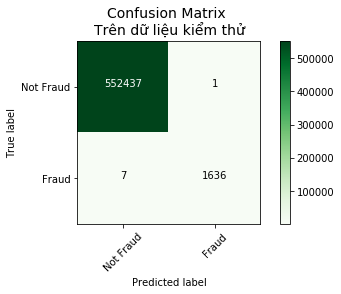

In [0]:
# Confusion matrix: dữ liệu test
actual_cm_test_set = np.mean(conf_matrix_list_of_arrays_test_set, axis=0).astype(int)
labels = ['Not Fraud', 'Fraud']
plot_confusion_matrix(actual_cm_test_set, labels, title="Confusion Matrix \nTrên dữ liệu kiểm thử", cmap=plt.cm.Greens)

#####7.1.2 Với dữ liệu đã xử lý mất cân bằng - overfiting

In [0]:
print(df_with_overspampling['isFraud'].value_counts())
df_with_overspampling.head()

1    1283313
0     135626
Name: isFraud, dtype: int64


,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,isFraud
0,3481951,576.0,1.0,451399.66,451399.66,0.00,215513.02,666912.68,0.0,-1.164153e-10,1
1,1494917,178.0,1.0,408401.45,689392.00,280990.55,147126.43,555527.88,0.0,0.000000e+00,0
2,4494752,496.0,0.0,174725.11,174725.11,0.00,-1.00,-1.00,0.0,1.747251e+05,1
3,4345240,273.0,0.0,76642.85,76642.85,0.00,-1.00,-1.00,0.0,7.664285e+04,1
4,4593205,4.0,0.0,169941.73,169941.73,0.00,-1.00,-1.00,0.0,1.699417e+05,1


In [0]:
# df_with_overspampling = df_with_overspampling.iloc[:, 1:]
# Tách các thuộc tính độc lập và thuộc tính phụ thuộc
y = df_with_overspampling['isFraud']
X = df_with_overspampling.drop('isFraud', axis=1)

# Chia tập dữ liệu 2 phân: tập huấn luyện và tập kiểm thử 
# Tỷ lệ: train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

1    1283313
0     135626
Name: isFraud, dtype: int64
1    1026582
0     108569
Name: isFraud, dtype: int64
1    256731
0     27057
Name: isFraud, dtype: int64


In [0]:
# Mô hình
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_features='sqrt', random_state=42)
# Danh sách confusion matrix của từng lần KFold
conf_matrix_list_of_arrays = []
conf_matrix_list_of_arrays_test_set = []
# Danh sách độ chính xác của từng lần KFold trên dữ liệu test
accuracy_models = []
accuracy_test_set = []
f1_score_train = []
f1_score_test = []
# KFold = 3
kf = KFold(n_splits=3)
kf.get_n_splits(X_train)
# Thời gian bắt đầu train
start_ho = timer()
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_tr, y_tr)
    # Print the accuracy
    y_pre_train = model.predict(X_te)
    y_pre_test = model.predict(X_test)
    accuracy_models.append(
        accuracy_score(y_te, y_pre_train, normalize=True)*100)
    accuracy_test_set.append(
        accuracy_score(y_test, y_pre_test, normalize=True)*100)
    # Confusion matrix
    conf_matrix = confusion_matrix(y_te, y_pre_train)
    conf_matrix_list_of_arrays.append(conf_matrix)
    conf_matrix_2 = confusion_matrix(y_test, y_pre_test)
    conf_matrix_list_of_arrays_test_set.append(conf_matrix_2)
    # F1 score
    f1_score_train.append(f1_score(y_te, y_pre_train))
    f1_score_test.append(f1_score(y_test, y_pre_test))
# Độ chính xác của mô hình
print('Độ chính xác của mô hình trên dữ liệu train: ', accuracy_models)
print('Độ chính xác của mô hình trên dữ liệu test: ', accuracy_test_set)
print('Độ chính xác trung bình dữ liệu train:', np.mean(accuracy_models))
print('Độ chính xác trung bình dữ liệu test:', np.mean(accuracy_test_set))
print('F1 score trung bình trên dữ liệu train:', np.mean(f1_score_train))
print('F1 score trung bình trên dữ liệu test:', np.mean(f1_score_test))
# Thời gian kết thúc train
end_ho = timer()
# Tổng thời thực hiện
time_ho = (end_ho - start_ho)
print('Thời gian thực hiện: ', time_ho, ' giây')

Độ chính xác của mô hình trên dữ liệu train:  [99.9997357182122, 100.0, 100.0]
Độ chính xác của mô hình trên dữ liệu test:  [100.0, 100.0, 100.0]
Độ chính xác trung bình dữ liệu train: 99.99991190607074
Độ chính xác trung bình dữ liệu test: 100.0
F1 score trung bình trên dữ liệu train: 0.9999995129020082
F1 score trung bình trên dữ liệu test: 1.0
Thời gian thực hiện:  50.10466454000016  giây


Confusion matrix, without normalization
[[ 27057      0]
 [     0 256731]]


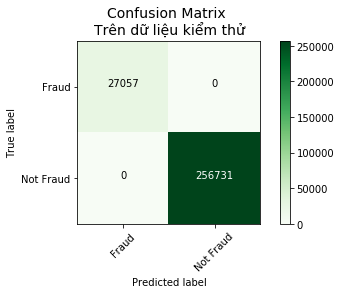

In [0]:
actual_cm_test_set = np.mean(conf_matrix_list_of_arrays_test_set, axis=0).astype(int)
labels = ['Fraud', 'Not Fraud']
plot_confusion_matrix(actual_cm_test_set, labels, title="Confusion Matrix \nTrên dữ liệu kiểm thử", cmap=plt.cm.Greens)

#####7.1.3 Với dữ liệu đã xử lý mất cân bằng - underfiting

In [0]:
print(data_under_sampling['isFraud'].value_counts())
data_under_sampling.head()

1    5733
0     492
Name: isFraud, dtype: int64


,Unnamed: 0,Unnamed: 0.1,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,400705,4785673,343,1,802417.45,802417.45,0.0,49645.31,852062.77,1,0.0,-0.01
1,2018388,3192449,241,0,57734.59,57734.59,0.0,-1.00,-1.00,1,0.0,57734.59
2,1062282,142088,11,1,12461.00,12461.00,0.0,27964.11,40425.11,1,0.0,0.00
3,2561624,5099867,355,1,42483.97,42483.97,0.0,51495.75,93979.72,1,0.0,0.00
4,71426,6118821,537,0,34238.20,34238.20,0.0,-1.00,-1.00,1,0.0,34238.20


In [0]:
# data_under_sampling = data_under_sampling.iloc[:, 1:]
# Tách các thuộc tính độc lập và thuộc tính phụ thuộc
y = data_under_sampling['isFraud']
X = data_under_sampling.drop('isFraud', axis=1)

# Chia tập dữ liệu 2 phân: tập huấn luyện và tập kiểm thử 
# Tỷ lệ: train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

1    5733
0     492
Name: isFraud, dtype: int64
1    4582
0     398
Name: isFraud, dtype: int64
1    1151
0      94
Name: isFraud, dtype: int64


In [0]:
# Mô hình
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_features='sqrt', random_state=42)
# Danh sách confusion matrix của từng lần KFold
conf_matrix_list_of_arrays = []
conf_matrix_list_of_arrays_test_set = []
# Danh sách độ chính xác của từng lần KFold trên dữ liệu test
accuracy_models = []
accuracy_test_set = []
f1_score_train = []
f1_score_test = []
# KFold = 3
kf = KFold(n_splits=3)
kf.get_n_splits(X_train)
# Thời gian bắt đầu train
start_ho = timer()
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_tr, y_tr)
    # Print the accuracy
    y_pre_train = model.predict(X_te)
    y_pre_test = model.predict(X_test)
    accuracy_models.append(
        accuracy_score(y_te, y_pre_train, normalize=True)*100)
    accuracy_test_set.append(
        accuracy_score(y_test, y_pre_test, normalize=True)*100)
    # Confusion matrix
    conf_matrix = confusion_matrix(y_te, y_pre_train)
    conf_matrix_list_of_arrays.append(conf_matrix)
    conf_matrix_2 = confusion_matrix(y_test, y_pre_test)
    conf_matrix_list_of_arrays_test_set.append(conf_matrix_2)
    # F1 score
    f1_score_train.append(f1_score(y_te, y_pre_train))
    f1_score_test.append(f1_score(y_test, y_pre_test))
# Độ chính xác của mô hình
print('Độ chính xác của mô hình trên dữ liệu train: ', accuracy_models)
print('Độ chính xác của mô hình trên dữ liệu test: ', accuracy_test_set)
print('Độ chính xác trung bình dữ liệu train:', np.mean(accuracy_models))
print('Độ chính xác trung bình dữ liệu test:', np.mean(accuracy_test_set))
print('F1 score trung bình trên dữ liệu train:', np.mean(f1_score_train))
print('F1 score trung bình trên dữ liệu test:', np.mean(f1_score_test))
# Thời gian kết thúc train
end_ho = timer()
# Tổng thời thực hiện
time_ho = (end_ho - start_ho)
print('Thời gian thực hiện: ', time_ho, ' giây')

Độ chính xác của mô hình trên dữ liệu train:  [99.93975903614458, 100.0, 99.93975903614458]
Độ chính xác của mô hình trên dữ liệu test:  [99.91967871485944, 100.0, 100.0]
Độ chính xác trung bình dữ liệu train: 99.95983935742971
Độ chính xác trung bình dữ liệu test: 99.97322623828649
F1 score trung bình trên dữ liệu train: 0.9997807011611476
F1 score trung bình trên dữ liệu test: 0.9998552612534376
Thời gian thực hiện:  1.4243449770001462  giây


Confusion matrix, without normalization
[[  93    0]
 [   0 1151]]


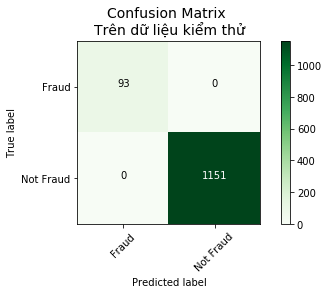

In [0]:
actual_cm_test_set = np.mean(conf_matrix_list_of_arrays_test_set, axis=0).astype(int)
labels = ['Fraud', 'Not Fraud']
plot_confusion_matrix(actual_cm_test_set, labels, title="Confusion Matrix \nTrên dữ liệu kiểm thử", cmap=plt.cm.Greens)

###7.2 Thuật toán xgboost(Extreme Gradient Boosting)


#####7.2.1 Với dữ liệu chưa xử lý cân bằng

In [0]:
data_clean['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [0]:
# Load data
data_clean = data_clean.iloc[:, 1:]
X = data_clean.drop('isFraud', axis=1)
y = data_clean['isFraud']

In [0]:
# Tách dữ liệu thành train set và test set
# Chúng tôi sẽ sử dụng xác thực chéo trên tập huấn luyện để điều chỉnh các tham số, sau đó kiểm tra dữ liệu chưa xem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [0]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

0    2762196
1       8213
Name: isFraud, dtype: int64
0    1933537
1       5749
Name: isFraud, dtype: int64
0    828659
1      2464
Name: isFraud, dtype: int64


In [0]:
# Mô hình
model = XGBClassifier(objective="binary:logistic", random_state=42)
# Danh sách confusion matrix của từng lần KFold
conf_matrix_list_of_arrays = []
conf_matrix_list_of_arrays_test_set = []
# Danh sách độ chính xác của từng lần KFold trên dữ liệu test
accuracy_models = []
accuracy_test_set = []
f1_score_train = []
f1_score_test = []
# KFold = 3
kf = StratifiedKFold(n_splits=3)
kf.get_n_splits(X_train, y_train)
# Thời gian bắt đầu train
start_ho = timer()
for train_index, test_index in kf.split(X_train, y_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_tr, y_tr)
    y_pre_train = model.predict(X_te)
    y_pre_test = model.predict(X_test)
    # Print the accuracy
    accuracy_models.append(
        accuracy_score(y_te, y_pre_train, normalize=True)*100)
    accuracy_test_set.append(
        accuracy_score(y_test, y_pre_test, normalize=True)*100)
    # Confusion matrix
    conf_matrix = confusion_matrix(y_te, y_pre_train)
    conf_matrix_list_of_arrays.append(conf_matrix)
    conf_matrix_2 = confusion_matrix(y_test, y_pre_test)
    conf_matrix_list_of_arrays_test_set.append(conf_matrix_2)
    # F1 score
    f1_score_train.append(f1_score(y_te, y_pre_train))
    f1_score_test.append(f1_score(y_test, y_pre_test))
# Độ chính xác của mô hình
print('Độ chính xác của mô hình trên dữ liệu train: ', accuracy_models)
print('Độ chính xác của mô hình trên dữ liệu test: ', accuracy_test_set)
print('Độ chính xác trung bình dữ liệu train:', np.mean(accuracy_models))
print('Độ chính xác trung bình dữ liệu test:', np.mean(accuracy_test_set))
print('F1 score trung bình trên dữ liệu train:', np.mean(f1_score_train))
print('F1 score trung bình trên dữ liệu test:', np.mean(f1_score_test))
# Thời gian kết thúc train
end_ho = timer()
# Tổng thời thực hiện
time_ho = (end_ho - start_ho)
print('Thời gian thực hiện: ', time_ho, ' giây')

Độ chính xác của mô hình trên dữ liệu train:  [99.99798895472054, 99.99876242984524, 99.99891712611458]
Độ chính xác của mô hình trên dữ liệu test:  [99.99831553211739, 99.99855617038634, 99.99843585125187]
Độ chính xác trung bình dữ liệu train: 99.99855617022679
Độ chính xác trung bình dữ liệu test: 99.99843585125187
F1 score trung bình trên dữ liệu train: 0.9975606413944232
F1 score trung bình trên dữ liệu test: 0.9973561389517114
Thời gian thực hiện:  257.53190959899985  giây


Confusion matrix, without normalization
[[828658      1]
 [    12   2452]]


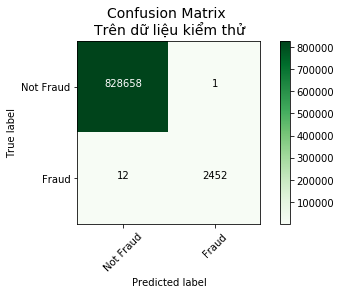

In [0]:
# Confusion matrix: dữ liệu test
actual_cm_test_set = np.mean(conf_matrix_list_of_arrays_test_set, axis=0).astype(int)
labels = ['Not Fraud', 'Fraud']
plot_confusion_matrix(actual_cm_test_set, labels, title="Confusion Matrix \nTrên dữ liệu kiểm thử", cmap=plt.cm.Greens)

**Nhận xét:**
- Có 828658 giao dịch không gian lận được dự đoán đúng là giao dịch không gian lận
- 0 lần giao dịch không gian lận được dự sai đoán là giao dịch gian lận
- 12 lần giao dịch gian lận được dự đoán sai là giao dịch không gian lận
- 2452 lần giao dịch gian lận được dự đoán chính xác là giao dịch gian lận

#####7.2.2 Với dữ liệu đã xử lý cân bằng - Overfiting

In [0]:
print(df_with_overspampling['isFraud'].value_counts())
df_with_overspampling.head()

1    1283313
0     135626
Name: isFraud, dtype: int64


,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest,isFraud
0,3481951,576.0,1.0,451399.66,451399.66,0.00,215513.02,666912.68,0.0,-1.164153e-10,1
1,1494917,178.0,1.0,408401.45,689392.00,280990.55,147126.43,555527.88,0.0,0.000000e+00,0
2,4494752,496.0,0.0,174725.11,174725.11,0.00,-1.00,-1.00,0.0,1.747251e+05,1
3,4345240,273.0,0.0,76642.85,76642.85,0.00,-1.00,-1.00,0.0,7.664285e+04,1
4,4593205,4.0,0.0,169941.73,169941.73,0.00,-1.00,-1.00,0.0,1.699417e+05,1


In [0]:
# Load data
df_with_overspampling = df_with_overspampling.iloc[:, 1:]
X = df_with_overspampling.drop('isFraud', axis=1)
y = df_with_overspampling['isFraud']

In [0]:
# Tách dữ liệu thành train set và test set
# Chúng tôi sẽ sử dụng xác thực chéo trên tập huấn luyện để điều chỉnh các tham số, sau đó kiểm tra dữ liệu chưa xem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [0]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

1    1283313
0     135626
Name: isFraud, dtype: int64
1    1026650
0     108501
Name: isFraud, dtype: int64
1    256663
0     27125
Name: isFraud, dtype: int64


In [0]:
# Mô hình
model = XGBClassifier(objective="binary:logistic", random_state=42)
# Danh sách confusion matrix của từng lần KFold
conf_matrix_list_of_arrays = []
conf_matrix_list_of_arrays_test_set = []
# Danh sách độ chính xác của từng lần KFold trên dữ liệu test
accuracy_models = []
accuracy_test_set = []
f1_score_train = []
f1_score_test = []
# KFold = 3
kf = StratifiedKFold(n_splits=3)
kf.get_n_splits(X_train, y_train)
# Thời gian bắt đầu train
start_ho = timer()
for train_index, test_index in kf.split(X_train, y_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_tr, y_tr)
    y_pre_train = model.predict(X_te)
    y_pre_test = model.predict(X_test)
    # Print the accuracy
    accuracy_models.append(
        accuracy_score(y_te, y_pre_train, normalize=True)*100)
    accuracy_test_set.append(
        accuracy_score(y_test, y_pre_test, normalize=True)*100)
    # Confusion matrix
    conf_matrix = confusion_matrix(y_te, y_pre_train)
    conf_matrix_list_of_arrays.append(conf_matrix)
    conf_matrix_2 = confusion_matrix(y_test, y_pre_test)
    conf_matrix_list_of_arrays_test_set.append(conf_matrix_2)
    # F1 score
    f1_score_train.append(f1_score(y_te, y_pre_train))
    f1_score_test.append(f1_score(y_test, y_pre_test))
# Độ chính xác của mô hình
print('Độ chính xác của mô hình trên dữ liệu train: ', accuracy_models)
print('Độ chính xác của mô hình trên dữ liệu test: ', accuracy_test_set)
print('Độ chính xác trung bình dữ liệu train:', np.mean(accuracy_models))
print('Độ chính xác trung bình dữ liệu test:', np.mean(accuracy_test_set))
print('F1 score trung bình trên dữ liệu train:', np.mean(f1_score_train))
print('F1 score trung bình trên dữ liệu test:', np.mean(f1_score_test))
# Thời gian kết thúc train
end_ho = timer()
# Tổng thời thực hiện
time_ho = (end_ho - start_ho)
print('Thời gian thực hiện: ', time_ho, ' giây')

Độ chính xác của mô hình trên dữ liệu train:  [100.0, 100.0, 99.99973571751374]
Độ chính xác của mô hình trên dữ liệu test:  [99.99964762428291, 99.99964762428291, 99.99964762428291]
Độ chính xác trung bình dữ liệu train: 99.99991190583792
Độ chính xác trung bình dữ liệu test: 99.9996476242829
F1 score trung bình trên dữ liệu train: 0.9999995129788696
F1 score trung bình trên dữ liệu test: 0.9999980519240173
Thời gian thực hiện:  73.51959818499927  giây


Confusion matrix, without normalization
[[ 27124      1]
 [     0 256663]]


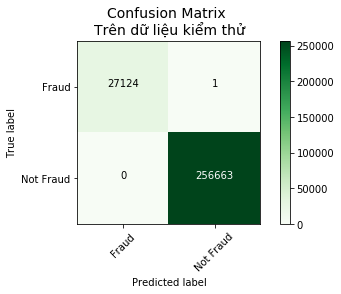

In [0]:
# Confusion matrix: dữ liệu test
actual_cm_test_set = np.mean(conf_matrix_list_of_arrays_test_set, axis=0).astype(int)
labels = ['Fraud', 'Not Fraud']
plot_confusion_matrix(actual_cm_test_set, labels, title="Confusion Matrix \nTrên dữ liệu kiểm thử", cmap=plt.cm.Greens)

**Nhận xét:**
- Có 828658 giao dịch không gian lận được dự đoán đúng là giao dịch không gian lận
- 0 lần giao dịch không gian lận được dự sai đoán là giao dịch gian lận
- 12 lần giao dịch gian lận được dự đoán sai là giao dịch không gian lận
- 2452 lần giao dịch gian lận được dự đoán chính xác là giao dịch gian lận

#==============================================

#Đoạn này dùng để ra hội đồng - câu 13

In [0]:
import pickle
# Save to file in the current working directory
xgboost_oversampling = "xgboost_oversampling.pkl"
with open(xgboost_oversampling, 'wb') as file:
    pickle.dump(model, file)

In [0]:
# Load from file
with open(xgboost_oversampling, 'rb') as file:
    pickle_model = pickle.load(file)

In [0]:
X_test_test =  X_test.head()
X_test_test

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
1231407,360.0,1.0,78357.77,78357.77,0.0,10533.98,88891.75,0.0,0.00
1409245,451.0,0.0,9265.43,9265.43,0.0,-1.00,-1.00,0.0,9265.43
1336755,25.0,1.0,18126.95,18126.95,0.0,0.00,18126.95,0.0,0.00
794519,458.0,1.0,167806.93,167806.93,0.0,0.00,167806.93,0.0,0.00
1272160,512.0,1.0,684266.09,684266.09,0.0,76615.04,760881.13,0.0,0.00


In [0]:
Ypredict = pickle_model.predict(X_test_test)
Ypredict

array([1, 1, 1, 1, 1])